<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.8 MB/s eta 0:00:00



===== SIMULATING 1D QW with CA Rule 30 Substrate =====
Using CA Rule 30 pattern (generated over 50 generations).
Substrate (first 30 sites): [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0]
Starting QW evolution on CA Rule 30 substrate...
  QW Step 10/100, S=0.9345
  QW Step 20/100, S=0.7982
  QW Step 30/100, S=0.6927
  QW Step 40/100, S=0.7474
  QW Step 50/100, S=0.7475
  QW Step 60/100, S=0.6234
  QW Step 70/100, S=0.9332
  QW Step 80/100, S=0.6640
  QW Step 90/100, S=0.7968
  QW Step 100/100, S=0.9082
QW Evolution complete. Time: 0.20s

    **Theoretical Interpretation (CA Rule 30 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker 

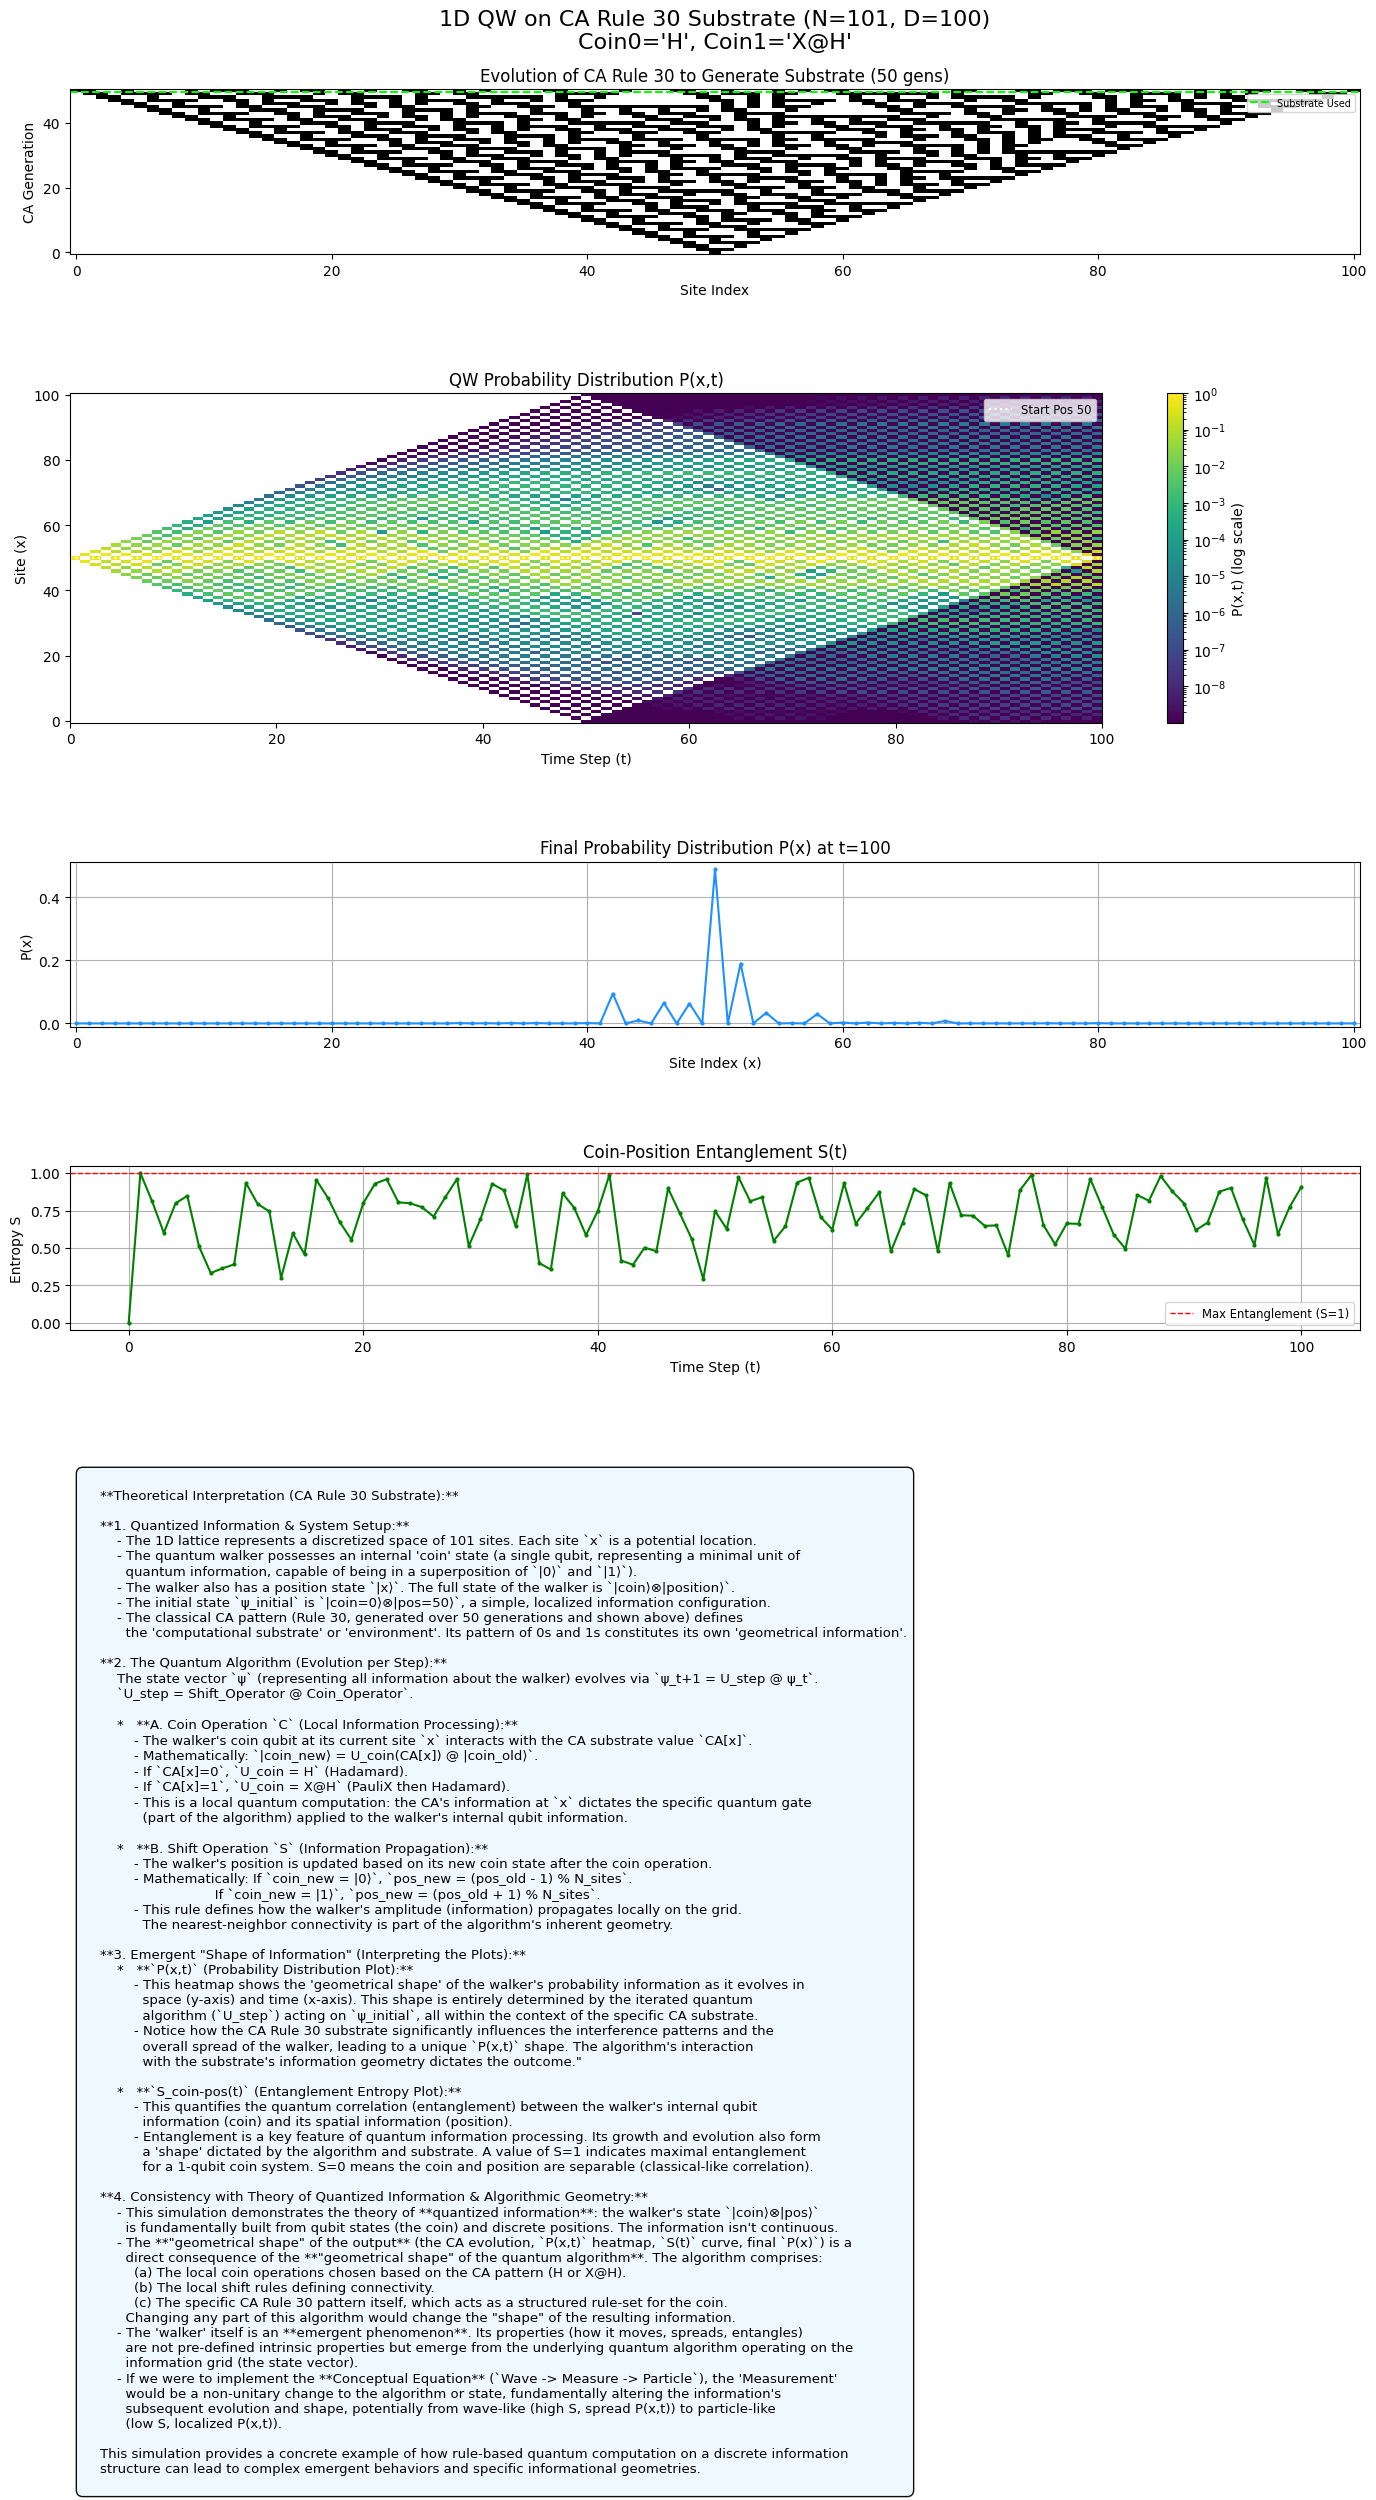


===== SIMULATING 1D QW with CA Rule 90 Substrate =====
Using CA Rule 90 pattern (generated over 50 generations).
Substrate (first 30 sites): [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Starting QW evolution on CA Rule 90 substrate...
  QW Step 10/100, S=0.8543
  QW Step 20/100, S=0.7732
  QW Step 30/100, S=0.9497
  QW Step 40/100, S=0.9835
  QW Step 50/100, S=0.9384
  QW Step 60/100, S=0.9796
  QW Step 70/100, S=0.9455
  QW Step 80/100, S=0.9897
  QW Step 90/100, S=0.9874
  QW Step 100/100, S=0.9904
QW Evolution complete. Time: 0.35s

    **Theoretical Interpretation (CA Rule 90 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker 

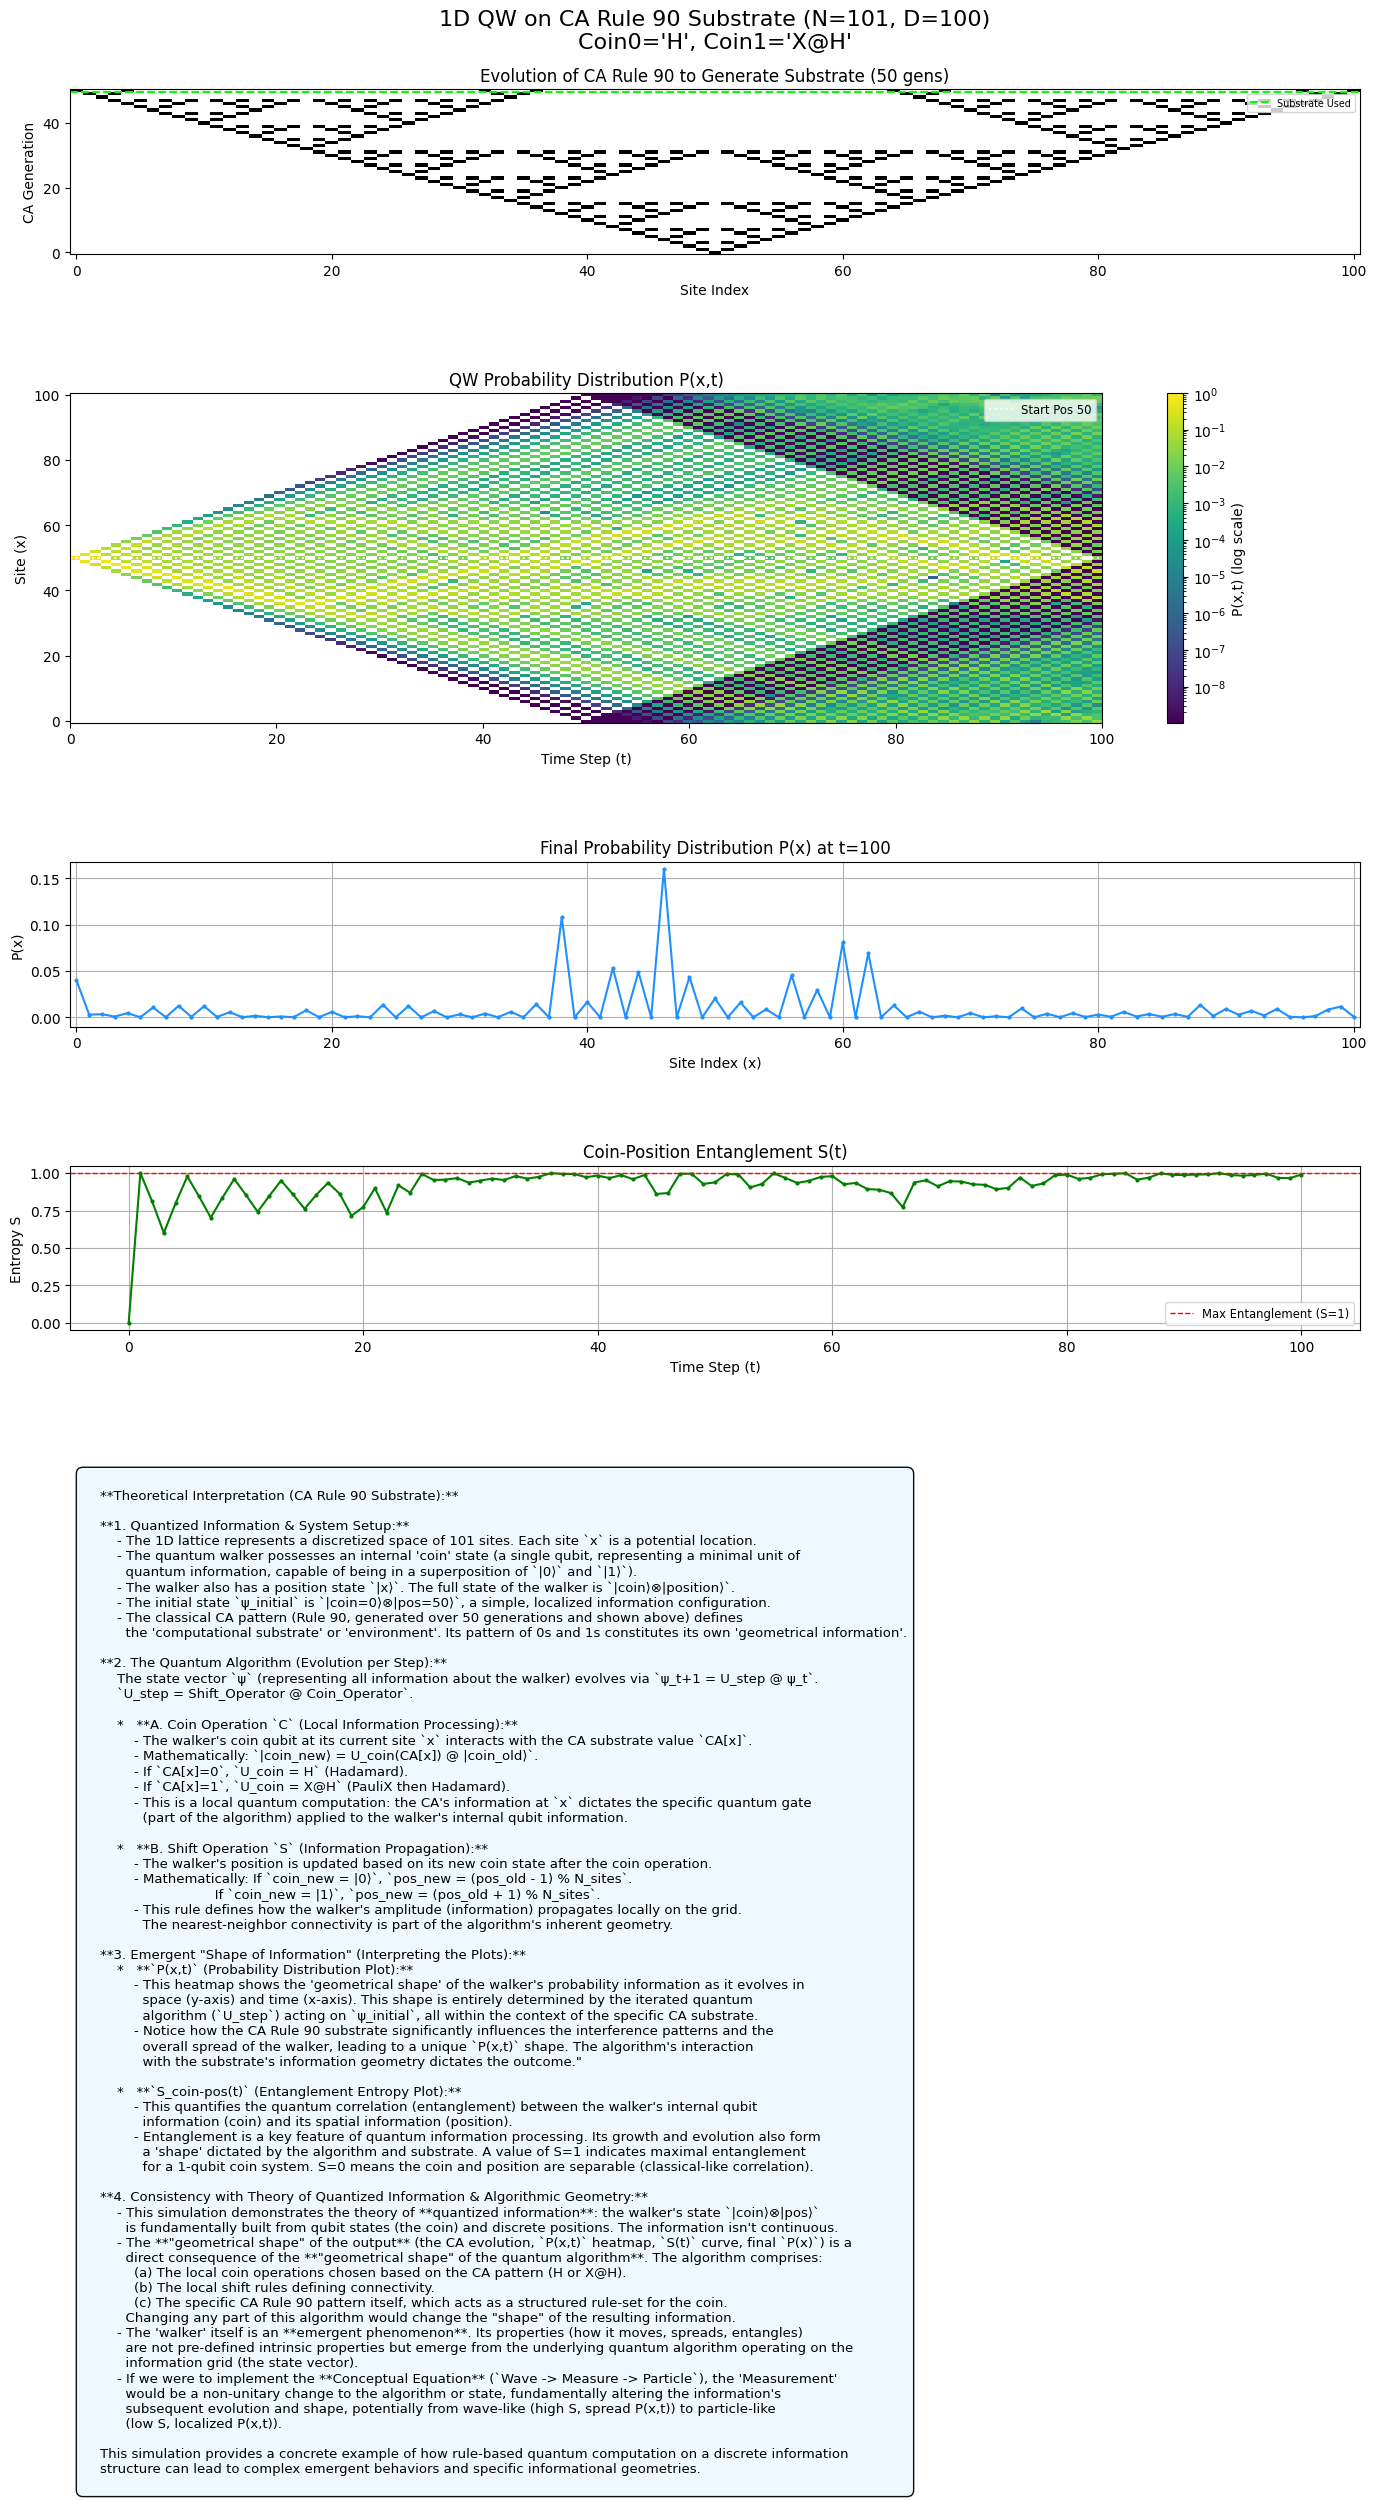


===== SIMULATING 1D QW with CA Rule 110 Substrate =====
Using CA Rule 110 pattern (generated over 50 generations).
Substrate (first 30 sites): [1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1]
Starting QW evolution on CA Rule 110 substrate...
  QW Step 10/100, S=0.7496
  QW Step 20/100, S=0.4350
  QW Step 30/100, S=0.3410
  QW Step 40/100, S=0.3873
  QW Step 50/100, S=0.3605
  QW Step 60/100, S=0.3882
  QW Step 70/100, S=0.5443
  QW Step 80/100, S=0.7377
  QW Step 90/100, S=0.8959
  QW Step 100/100, S=0.7213
QW Evolution complete. Time: 0.32s

    **Theoretical Interpretation (CA Rule 110 Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of 101 sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of 
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The wal

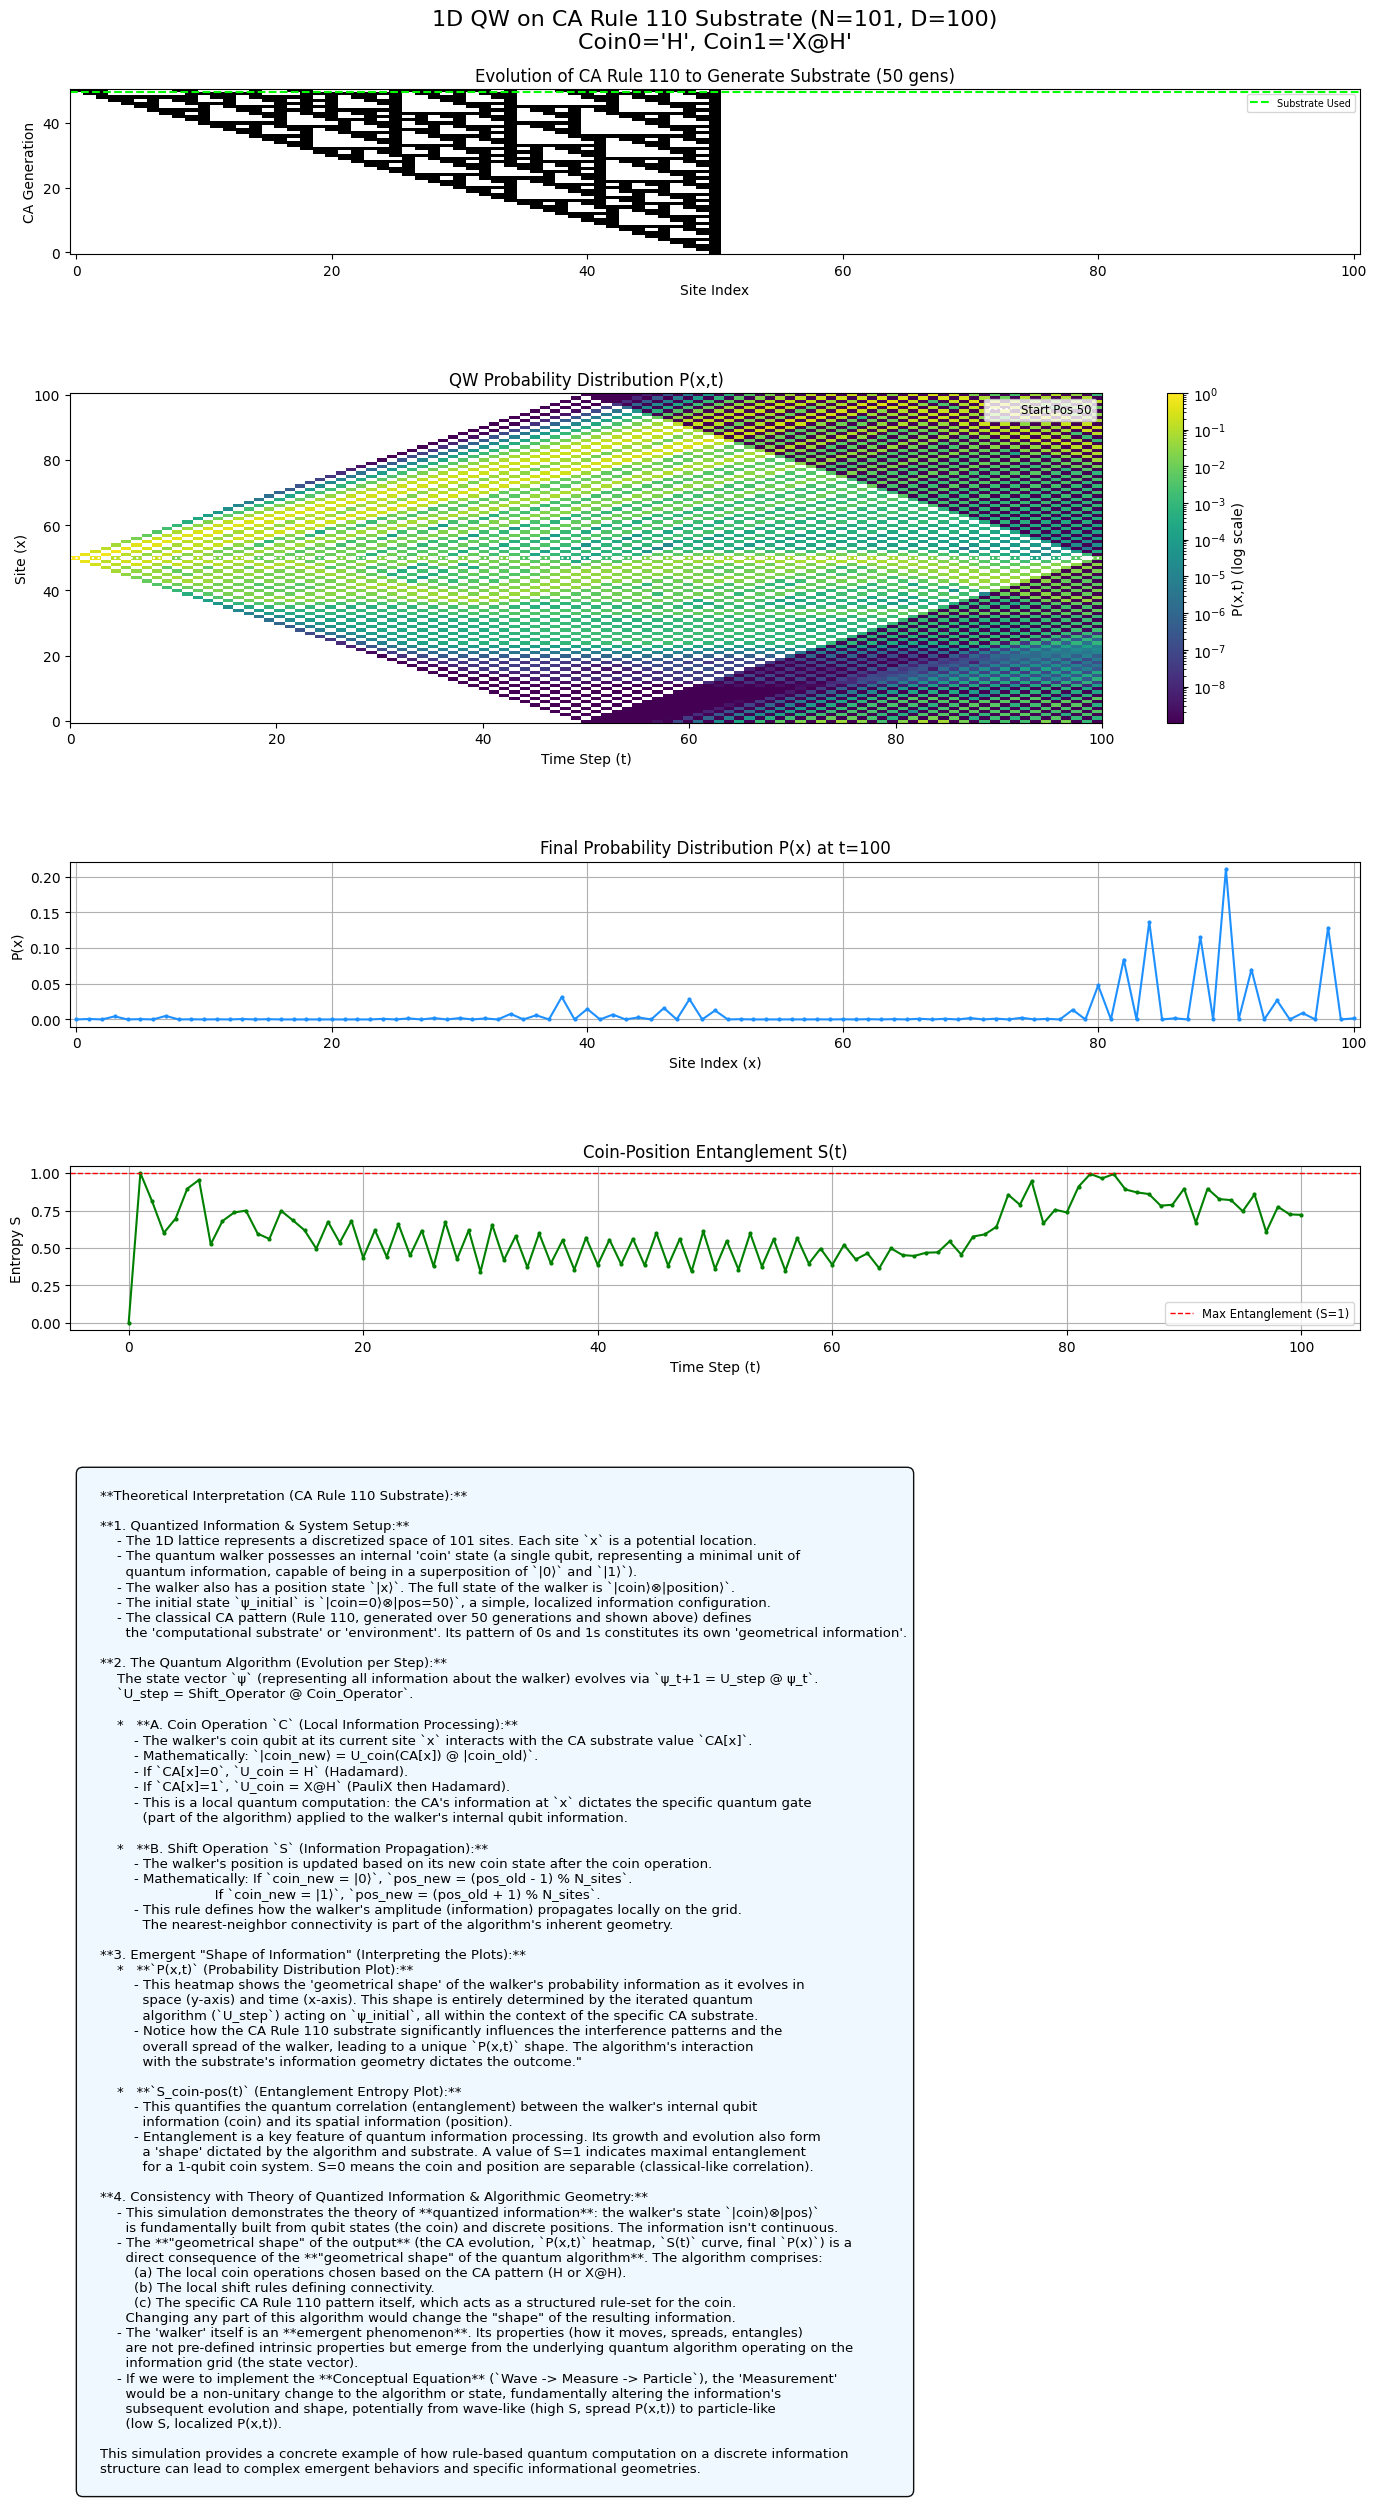


<<<<< END OF 1D QW CA SUBSTRATE SIMULATIONS >>>>>


In [6]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec # For more complex layouts
import time
import zlib

# --- Parameters ---
N_SITES_1D = 101
DEPTH = 100 # Number of QW steps
INITIAL_POS_1D = N_SITES_1D // 2
INITIAL_COIN_1D = 0
INITIAL_CA_CENTER_ONE = True
NUM_CA_GENERATIONS_FOR_SUBSTRATE = N_SITES_1D // 2 # How many steps to evolve CA for substrate

# --- CA Rule Update Function ---
def update_ca_line(current_line, rule_number):
    width = len(current_line); new_line = np.zeros(width, dtype=int)
    for i in range(width):
        pattern_val = (current_line[(i-1+width)%width]<<2)|(current_line[i]<<1)|current_line[(i+1)%width]
        if rule_number==30: new_line[i]=1 if pattern_val in [1,2,3,4] else 0
        elif rule_number==90: new_line[i]=1 if current_line[(i-1+width)%width]!=current_line[(i+1)%width] else 0
        elif rule_number==110: new_line[i]=1 if pattern_val in [1,2,3,5,6] else 0
        else: raise ValueError(f"Rule {rule_number} not implemented.")
    return new_line

def generate_ca_pattern_history(width, num_generations, rule_number, initial_center_one=True):
    line = np.zeros(width, dtype=int)
    if initial_center_one and width > 0:
        center_idx = width // 2
        if width % 2 == 1: line[center_idx] = 1
        else: line[center_idx - 1] = 1
    history = [line.copy()]
    for _ in range(num_generations):
        line = update_ca_line(line, rule_number)
        history.append(line.copy())
    return np.array(history)

# --- Coin Matrices ---
H_1Q = (1/np.sqrt(2))*np.array([[1,1],[1,-1]],dtype=np.complex128)
X_1Q = np.array([[0,1],[1,0]],dtype=np.complex128)
I_1Q = np.eye(2,dtype=np.complex128)
COIN_IF_CA_0 = H_1Q
COIN_IF_CA_1 = X_1Q @ H_1Q

# --- Helper Functions (1D QW) ---
def get_1d_index(coin_val, site_pos, n_sites_1d):
    if not (0 <= site_pos < n_sites_1d and 0 <= coin_val <= 1):
        raise IndexError(f"Invalid coin ({coin_val}) or pos ({site_pos}) for 1D (N={n_sites_1d})")
    return coin_val + 2 * site_pos

def get_1d_coin_pos_from_index(k, n_sites_1d):
    state_dim_1d = 2 * n_sites_1d
    if not (0 <= k < state_dim_1d):
        raise IndexError(f"Invalid k ({k}) for 1D (StateDim={state_dim_1d})")
    coin_val = k % 2
    site_pos = k // 2
    return coin_val, site_pos

# --- Initial State ---
def prepare_initial_state_1d(n_sites_1d, initial_pos, initial_coin_val=0):
    state_dim_1d = 2 * n_sites_1d; sv = np.zeros(state_dim_1d, dtype=np.complex128)
    try: sv[get_1d_index(initial_coin_val, initial_pos, n_sites_1d)] = 1.0
    except IndexError as e: print(f"Error in initial state prep: {e}")
    return sv

# --- Build QW Step Operator (CA-Dependent Coin) ---
def build_1d_qw_step_operator_ca_coin(n_sites_1d, ca_pattern_for_this_step, coin0_op, coin1_op):
    state_dim_1d = 2*n_sites_1d
    C_full = np.zeros((state_dim_1d, state_dim_1d), dtype=np.complex128)
    for site_idx in range(n_sites_1d):
        chosen_coin = coin0_op if ca_pattern_for_this_step[site_idx]==0 else coin1_op
        idx_s_c0=get_1d_index(0,site_idx,n_sites_1d); idx_s_c1=get_1d_index(1,site_idx,n_sites_1d)
        C_full[idx_s_c0,idx_s_c0]=chosen_coin[0,0]; C_full[idx_s_c1,idx_s_c0]=chosen_coin[1,0]
        C_full[idx_s_c0,idx_s_c1]=chosen_coin[0,1]; C_full[idx_s_c1,idx_s_c1]=chosen_coin[1,1]
    S_full = np.zeros((state_dim_1d, state_dim_1d), dtype=np.complex128)
    for k_in in range(state_dim_1d):
        cv,sp=get_1d_coin_pos_from_index(k_in,n_sites_1d)
        np_=(sp-1+n_sites_1d)%n_sites_1d if cv==0 else (sp+1)%n_sites_1d
        S_full[get_1d_index(cv,np_,n_sites_1d), k_in] = 1.0
    return S_full @ C_full

# --- Observables ---
def calculate_p1_position_1d(sv,n):
    pd=np.zeros(n);
    for i in range(n): pd[i]=np.abs(sv[get_1d_index(0,i,n)])**2+np.abs(sv[get_1d_index(1,i,n)])**2
    return pd

def calculate_coin_position_entanglement_1d(sv,n):
    if np.allclose(sv,0):return 0.0
    cd=2;sd=cd*n
    if len(sv)!=sd:return np.nan
    norm=np.linalg.norm(sv);
    if norm<1e-9:return 0.0
    if np.abs(norm-1)>1e-6:sv=sv/norm
    rho=np.outer(sv,np.conj(sv));rho_c=np.zeros((cd,cd),dtype=np.complex128)
    for i in range(n):
        for r,c in [(x,y) for x in range(cd) for y in range(cd)]:rho_c[r,c]+=rho[get_1d_index(r,i,n),get_1d_index(c,i,n)]
    tr=np.trace(rho_c)
    if abs(tr)<1e-9:return 0.0
    if np.abs(tr-1)>1e-6:rho_c/=tr
    eigs=np.linalg.eigvalsh(rho_c);ent=0.0
    for e in eigs:ent-=(e*np.log2(e) if e>1e-12 else 0.0)
    return max(0.0,np.real(ent))

# --- Simulation Loop ---
def run_1d_qw_ca_substrate(
    n_sites, depth, initial_pos, initial_coin,
    ca_rule_number, num_ca_generations, initial_ca_center_one,
    coin_if_ca0, coin_if_ca1
):
    print(f"\n===== SIMULATING 1D QW with CA Rule {ca_rule_number} Substrate =====")
    initial_qw_state = prepare_initial_state_1d(n_sites, initial_pos, initial_coin)

    ca_evolution_history = generate_ca_pattern_history(n_sites, num_ca_generations, ca_rule_number, initial_ca_center_one)
    ca_pattern_substrate = ca_evolution_history[-1]

    print(f"Using CA Rule {ca_rule_number} pattern (generated over {num_ca_generations} generations).")
    print(f"Substrate (first 30 sites): {ca_pattern_substrate[:min(30, n_sites)]}")

    U_step = build_1d_qw_step_operator_ca_coin(n_sites, ca_pattern_substrate, coin_if_ca0, coin_if_ca1)

    current_qw_state = initial_qw_state.copy()
    prob_history = np.full((depth + 1, n_sites), np.nan)
    ent_history = np.full(depth + 1, np.nan)

    prob_history[0, :] = calculate_p1_position_1d(current_qw_state, n_sites)
    ent_history[0] = calculate_coin_position_entanglement_1d(current_qw_state, n_sites)

    print(f"Starting QW evolution on CA Rule {ca_rule_number} substrate...")
    start_time = time.time()
    for step in range(depth):
        current_qw_state = U_step @ current_qw_state
        norm = np.linalg.norm(current_qw_state)
        if abs(norm) > 1e-9: current_qw_state /= norm
        else: print(f"Warning: State norm zero at step {step+1}"); break
        prob_history[step+1,:] = calculate_p1_position_1d(current_qw_state,n_sites)
        ent_history[step+1] = calculate_coin_position_entanglement_1d(current_qw_state,n_sites)
        if (step+1)%(max(1,depth//10))==0 or step==depth-1:
            print(f"  QW Step {step+1}/{depth}, S={ent_history[step+1] if np.isfinite(ent_history[step+1]) else 'NaN':.4f}")
    end_time = time.time()
    print(f"QW Evolution complete. Time: {end_time - start_time:.2f}s")

    return {
        "prob_history": prob_history, "ent_history": ent_history,
        "ca_evolution_history": ca_evolution_history, # Store full CA history for plotting
        "params": {"n_sites":n_sites, "depth":depth, "initial_pos":initial_pos,
                   "initial_coin":initial_coin, "ca_rule":ca_rule_number,
                   "num_ca_generations": num_ca_generations,
                   "coin0_name": "H" if np.allclose(coin_if_ca0, H_1Q) else "X@H",
                   "coin1_name": "X@H" if np.allclose(coin_if_ca1, X_1Q@H_1Q) else ("H" if np.allclose(coin_if_ca1, H_1Q) else "Other")
                   }
    }

# --- Plotting ---
def plot_qw_ca_results(results, theory_explanation_text):
    params=results["params"]; prob_h=results["prob_history"]; ent_h=results["ent_history"]
    ca_evolution_history = results["ca_evolution_history"]
    n_sites=params["n_sites"]; depth=params["depth"]
    initial_pos = params["initial_pos"]

    fig = plt.figure(figsize=(15, 20))
    gs = gridspec.GridSpec(5, 1, height_ratios=[1.5, 3, 1.5, 1.5, 4.0], hspace=0.55) # Adjusted hspace and theory height

    title_text = (f"1D QW on CA Rule {params['ca_rule']} Substrate (N={n_sites}, D={depth})\n"
                  f"Coin0='{params['coin0_name']}', Coin1='{params['coin1_name']}'")
    fig.suptitle(title_text, fontsize=16)

    # 1. CA Substrate Evolution Plot
    ax_ca = fig.add_subplot(gs[0])
    num_ca_gens_plot = ca_evolution_history.shape[0]
    ca_time_extent = [-0.5, n_sites - 0.5, -0.5, num_ca_gens_plot - 0.5]
    ax_ca.imshow(ca_evolution_history, cmap='binary', aspect='auto', interpolation='nearest', extent=ca_time_extent, origin='lower')
    ax_ca.set_title(f"Evolution of CA Rule {params['ca_rule']} to Generate Substrate ({params['num_ca_generations']} gens)");
    ax_ca.set_xlabel("Site Index"); ax_ca.set_ylabel("CA Generation")
    ax_ca.axhline(y=num_ca_gens_plot - 1 - 0.5, color='lime', linestyle='--', linewidth=1.5, label='Substrate Used')
    ax_ca.legend(loc='upper right', fontsize='x-small')

    # 2. P(x,t) Heatmap
    ax_pxt = fig.add_subplot(gs[1])
    time_ext_pxt=[0,depth, -0.5 ,n_sites-0.5]; ph_T=prob_h.T;pos_p=ph_T[ph_T>1e-9]
    min_v=pos_p.min() if len(pos_p)>0 else 1e-9; max_v=ph_T.max()
    norm_v=colors.LogNorm(vmin=min_v,vmax=max(max_v,min_v+1e-7) if max_v > min_v else min_v + 1e-7)
    im=ax_pxt.imshow(ph_T,aspect='auto',origin='lower',cmap='viridis',norm=norm_v,extent=time_ext_pxt)
    plt.colorbar(im,ax=ax_pxt,label="P(x,t) (log scale)");ax_pxt.set_title("QW Probability Distribution P(x,t)");ax_pxt.set_xlabel("Time Step (t)");ax_pxt.set_ylabel("Site (x)")
    ax_pxt.axhline(y=initial_pos, color='white', linestyle=':', linewidth=1.5, label=f'Start Pos {initial_pos}')
    ax_pxt.legend(loc='upper right', fontsize='small')

    # 3. Final P(x) Line Plot
    ax_final_px = fig.add_subplot(gs[2])
    site_indices = np.arange(n_sites)
    ax_final_px.plot(site_indices, prob_h[-1, :], marker='.', linestyle='-', color='dodgerblue', markersize=4)
    ax_final_px.set_title(f"Final Probability Distribution P(x) at t={depth}")
    ax_final_px.set_xlabel("Site Index (x)"); ax_final_px.set_ylabel("P(x)")
    ax_final_px.grid(True); ax_final_px.set_ylim(bottom=-0.01)
    ax_final_px.set_xlim(-0.5, n_sites - 0.5)

    # 4. Entanglement Entropy Plot
    ax_ent = fig.add_subplot(gs[3])
    ts=np.arange(depth+1);ax_ent.plot(ts,ent_h,marker='.',ls='-',color='green', markersize=4);
    ax_ent.set_title("Coin-Position Entanglement S(t)");ax_ent.set_xlabel("Time Step (t)");ax_ent.set_ylabel("Entropy S")
    ax_ent.grid(True);ax_ent.set_ylim(bottom=-0.05,top=1.05)
    ax_ent.axhline(y=1.0, color='red', linestyle='--', linewidth=1, label='Max Entanglement (S=1)')
    ax_ent.legend(loc='lower right', fontsize='small')

    # 5. Theory Text Area
    ax_theory = fig.add_subplot(gs[4])
    ax_theory.text(0.01, 0.99, theory_explanation_text, transform=ax_theory.transAxes, fontsize=9.5, # Slightly larger font
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', alpha=0.95))
    ax_theory.axis('off')

    fig.subplots_adjust(top=0.94, bottom=0.03, left=0.07, right=0.93, hspace=0.6) # Adjusted hspace more
    plt.show()

# --- Theory Explanation Text Generation ---
def get_theory_explanation_text(params_dict):
    ca_rule = params_dict["ca_rule"]
    n_sites = params_dict["n_sites"]
    initial_pos = params_dict["initial_pos"]
    initial_coin = params_dict["initial_coin"]
    coin0_name = params_dict["coin0_name"]
    coin1_name = params_dict["coin1_name"]
    num_ca_gens = params_dict["num_ca_generations"]

    return f"""
    **Theoretical Interpretation (CA Rule {ca_rule} Substrate):**

    **1. Quantized Information & System Setup:**
        - The 1D lattice represents a discretized space of {n_sites} sites. Each site `x` is a potential location.
        - The quantum walker possesses an internal 'coin' state (a single qubit, representing a minimal unit of
          quantum information, capable of being in a superposition of `|0⟩` and `|1⟩`).
        - The walker also has a position state `|x⟩`. The full state of the walker is `|coin⟩⊗|position⟩`.
        - The initial state `ψ_initial` is `|coin={initial_coin}⟩⊗|pos={initial_pos}⟩`, a simple, localized information configuration.
        - The classical CA pattern (Rule {ca_rule}, generated over {num_ca_gens} generations and shown above) defines
          the 'computational substrate' or 'environment'. Its pattern of 0s and 1s constitutes its own 'geometrical information'.

    **2. The Quantum Algorithm (Evolution per Step):**
        The state vector `ψ` (representing all information about the walker) evolves via `ψ_t+1 = U_step @ ψ_t`.
        `U_step = Shift_Operator @ Coin_Operator`.

        *   **A. Coin Operation `C` (Local Information Processing):**
            - The walker's coin qubit at its current site `x` interacts with the CA substrate value `CA[x]`.
            - Mathematically: `|coin_new⟩ = U_coin(CA[x]) @ |coin_old⟩`.
            - If `CA[x]=0`, `U_coin = {coin0_name}` (Hadamard).
            - If `CA[x]=1`, `U_coin = {coin1_name}` (PauliX then Hadamard).
            - This is a local quantum computation: the CA's information at `x` dictates the specific quantum gate
              (part of the algorithm) applied to the walker's internal qubit information.

        *   **B. Shift Operation `S` (Information Propagation):**
            - The walker's position is updated based on its new coin state after the coin operation.
            - Mathematically: If `coin_new = |0⟩`, `pos_new = (pos_old - 1) % N_sites`.
                               If `coin_new = |1⟩`, `pos_new = (pos_old + 1) % N_sites`.
            - This rule defines how the walker's amplitude (information) propagates locally on the grid.
              The nearest-neighbor connectivity is part of the algorithm's inherent geometry.

    **3. Emergent "Shape of Information" (Interpreting the Plots):**
        *   **`P(x,t)` (Probability Distribution Plot):**
            - This heatmap shows the 'geometrical shape' of the walker's probability information as it evolves in
              space (y-axis) and time (x-axis). This shape is entirely determined by the iterated quantum
              algorithm (`U_step`) acting on `ψ_initial`, all within the context of the specific CA substrate.
            - Notice how the CA Rule {ca_rule} substrate significantly influences the interference patterns and the
              overall spread of the walker, leading to a unique `P(x,t)` shape. The algorithm's interaction
              with the substrate's information geometry dictates the outcome."

        *   **`S_coin-pos(t)` (Entanglement Entropy Plot):**
            - This quantifies the quantum correlation (entanglement) between the walker's internal qubit
              information (coin) and its spatial information (position).
            - Entanglement is a key feature of quantum information processing. Its growth and evolution also form
              a 'shape' dictated by the algorithm and substrate. A value of S=1 indicates maximal entanglement
              for a 1-qubit coin system. S=0 means the coin and position are separable (classical-like correlation).

    **4. Consistency with Theory of Quantized Information & Algorithmic Geometry:**
        - This simulation demonstrates the theory of **quantized information**: the walker's state `|coin⟩⊗|pos⟩`
          is fundamentally built from qubit states (the coin) and discrete positions. The information isn't continuous.
        - The **"geometrical shape" of the output** (the CA evolution, `P(x,t)` heatmap, `S(t)` curve, final `P(x)`) is a
          direct consequence of the **"geometrical shape" of the quantum algorithm**. The algorithm comprises:
            (a) The local coin operations chosen based on the CA pattern ({coin0_name} or {coin1_name}).
            (b) The local shift rules defining connectivity.
            (c) The specific CA Rule {ca_rule} pattern itself, which acts as a structured rule-set for the coin.
          Changing any part of this algorithm would change the "shape" of the resulting information.
        - The 'walker' itself is an **emergent phenomenon**. Its properties (how it moves, spreads, entangles)
          are not pre-defined intrinsic properties but emerge from the underlying quantum algorithm operating on the
          information grid (the state vector).
        - If we were to implement the **Conceptual Equation** (`Wave -> Measure -> Particle`), the 'Measurement'
          would be a non-unitary change to the algorithm or state, fundamentally altering the information's
          subsequent evolution and shape, potentially from wave-like (high S, spread P(x,t)) to particle-like
          (low S, localized P(x,t)).

    This simulation provides a concrete example of how rule-based quantum computation on a discrete information
    structure can lead to complex emergent behaviors and specific informational geometries.
    """

# --- Main Execution ---
if __name__ == "__main__":
    ca_rules_to_test = [30, 90, 110]

    for rule in ca_rules_to_test:
        results = run_1d_qw_ca_substrate(
            n_sites=N_SITES_1D,
            depth=DEPTH,
            initial_pos=INITIAL_POS_1D,
            initial_coin=INITIAL_COIN_1D,
            ca_rule_number=rule,
            num_ca_generations=NUM_CA_GENERATIONS_FOR_SUBSTRATE, # Pass this
            initial_ca_center_one=INITIAL_CA_CENTER_ONE,
            coin_if_ca0=COIN_IF_CA_0,
            coin_if_ca1=COIN_IF_CA_1
        )

        theory_text = get_theory_explanation_text(results["params"])

        # Print theory text to console first
        print(theory_text)

        # Then show plot which also includes the theory text
        plot_qw_ca_results(results, theory_text)

    print("\n<<<<< END OF 1D QW CA SUBSTRATE SIMULATIONS >>>>>")

Starting 2-Walker QW with CA-coupled coin (N_sites=17, Depth=30)...

===== Running 2-Walker Simulation with CA Rule 30 =====
Initialized Walker A at (5, c0), Walker B at (11, c1) Index: 792

Starting 2-Walker 1D QW (CA Rule 30) for 30 steps...
  2W-QW Step 6/30 completed. S(A)=0.683, S(B)=0.642
  2W-QW Step 12/30 completed. S(A)=0.824, S(B)=0.652
  2W-QW Step 18/30 completed. S(A)=0.986, S(B)=0.942
  2W-QW Step 24/30 completed. S(A)=0.924, S(B)=0.882
  2W-QW Step 30/30 completed. S(A)=0.909, S(B)=0.600
2-Walker QW Evolution complete. Time: 92.39 seconds.
**Theoretical Interpretation (2-Walker QW on CA Rule 30 Substrate):**

**1. Quantized Information & System Setup:**
    - The 1D lattice: A discretized space of 17 sites.
    - Quantum Walkers (A and B): Each possesses an internal 'coin' state (a single qubit) and a position state. 
      The joint state is `|coin_A⟩⊗|pos_A⟩⊗|coin_B⟩⊗|pos_B⟩`.
    - Initial State: Walker A at `|c0⟩|p5⟩`, Walker B at `|c1⟩|p11⟩`.
    - Shared Classical 

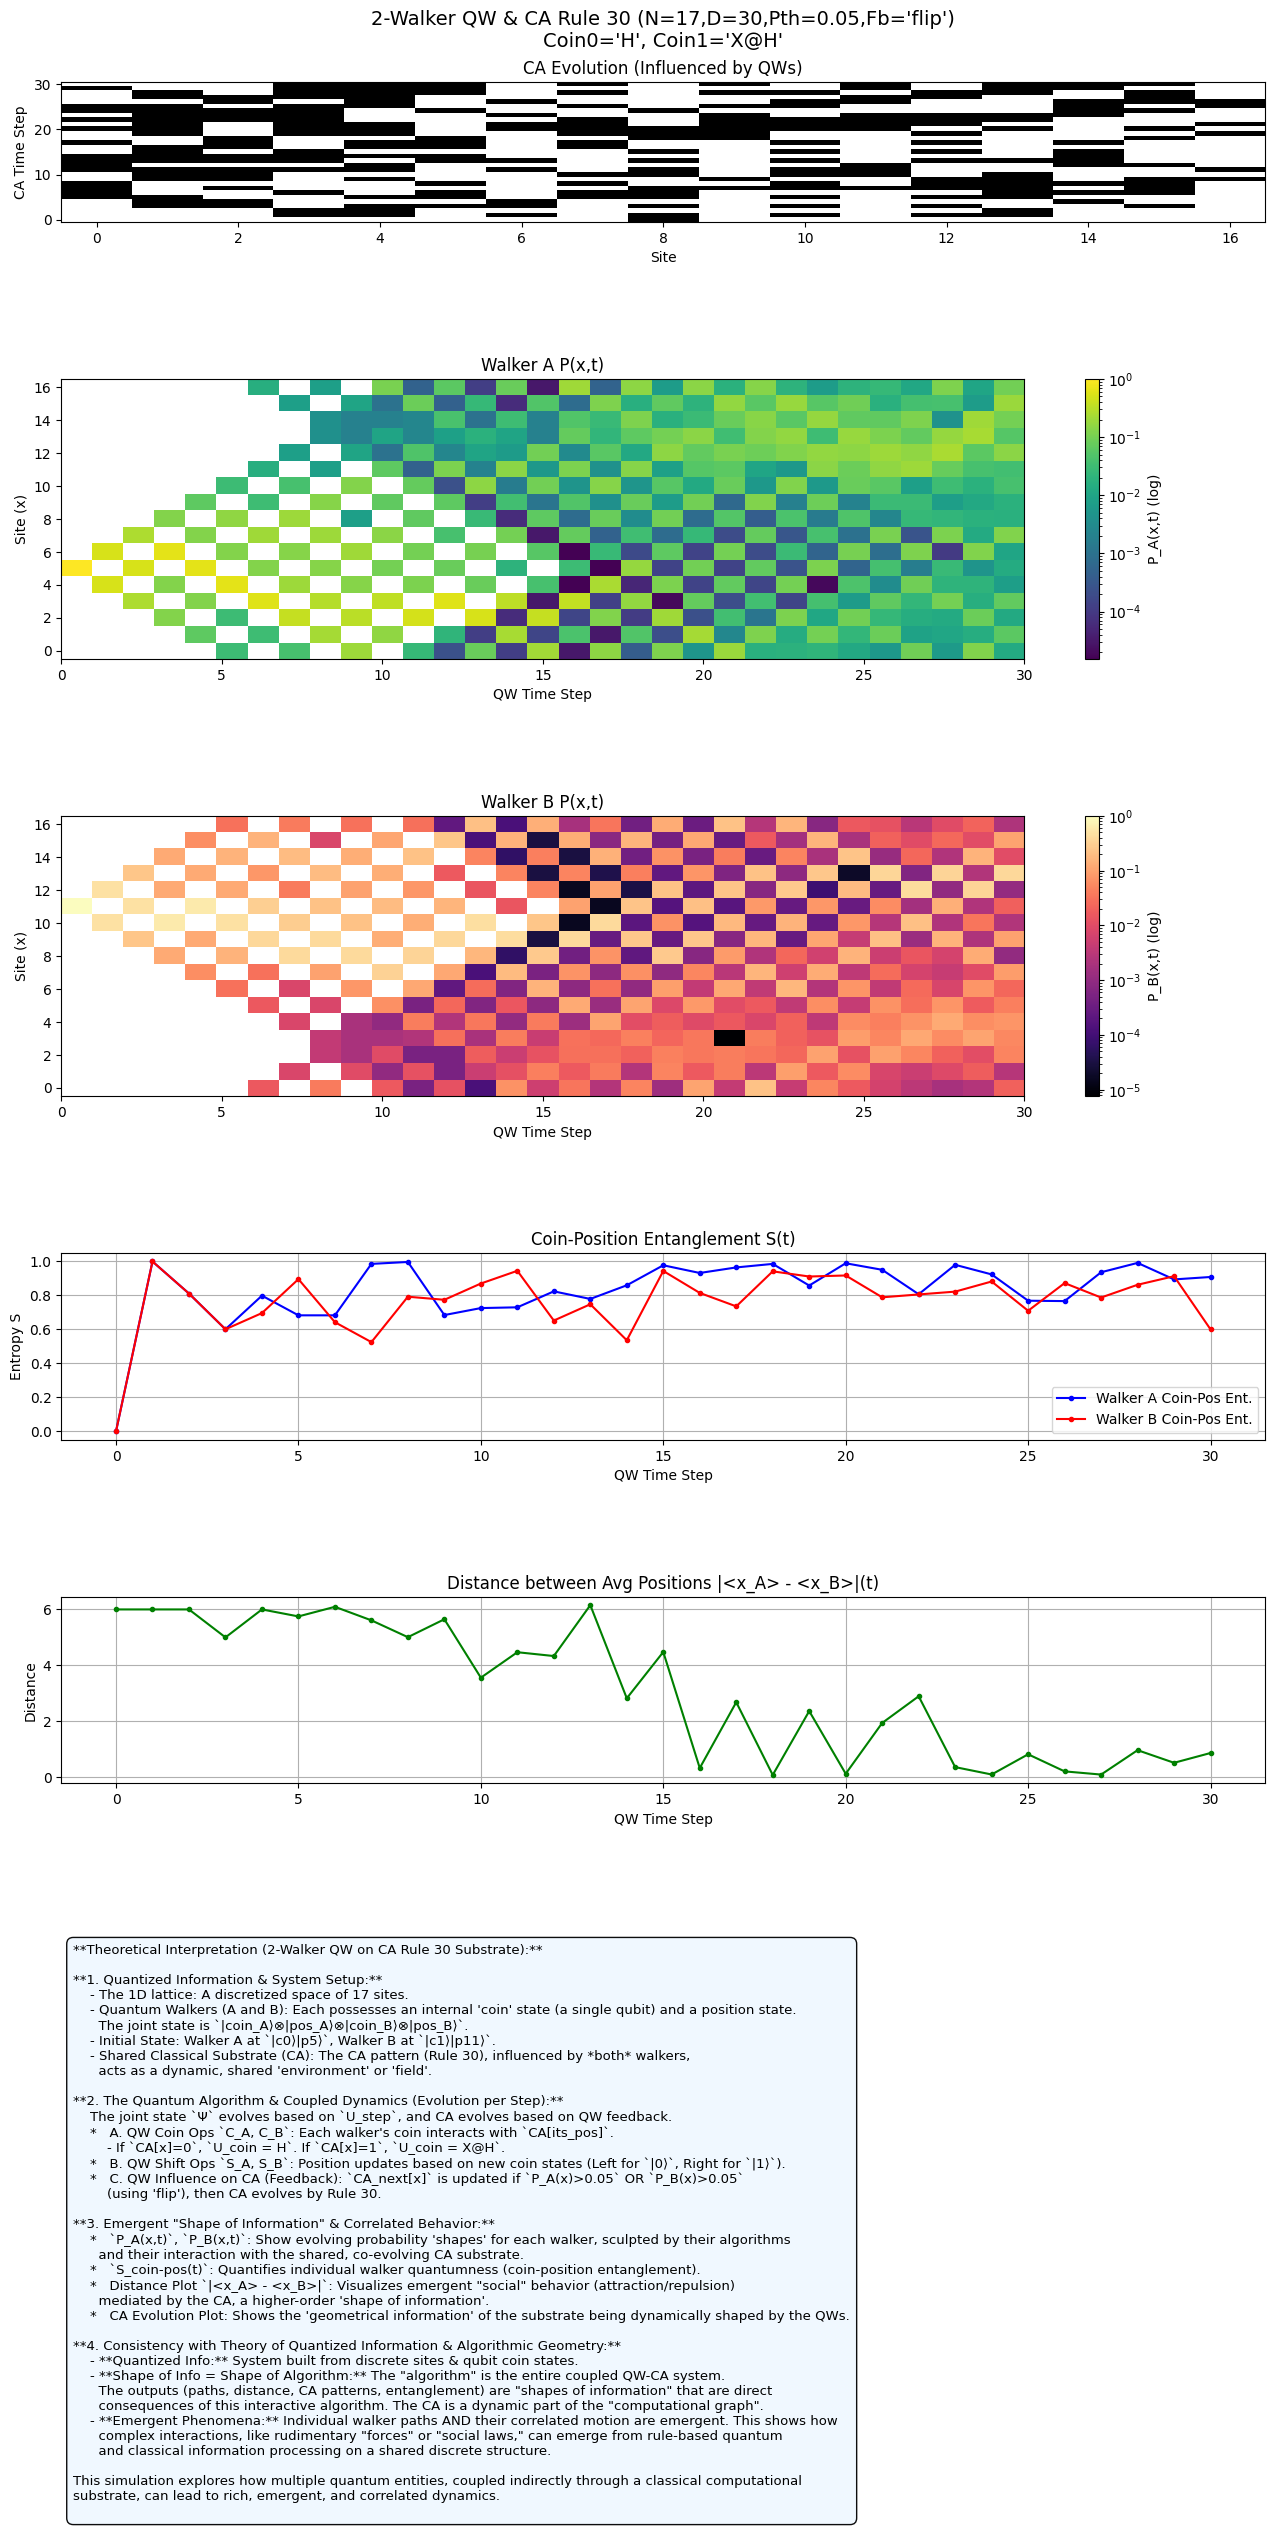


===== Running 2-Walker Simulation with CA Rule 90 =====
Initialized Walker A at (5, c0), Walker B at (11, c1) Index: 792

Starting 2-Walker 1D QW (CA Rule 90) for 30 steps...
  2W-QW Step 6/30 completed. S(A)=0.845, S(B)=0.845
  2W-QW Step 12/30 completed. S(A)=0.665, S(B)=0.964
  2W-QW Step 18/30 completed. S(A)=0.847, S(B)=0.771
  2W-QW Step 24/30 completed. S(A)=0.770, S(B)=0.976
  2W-QW Step 30/30 completed. S(A)=0.999, S(B)=0.830
2-Walker QW Evolution complete. Time: 93.94 seconds.
**Theoretical Interpretation (2-Walker QW on CA Rule 90 Substrate):**

**1. Quantized Information & System Setup:**
    - The 1D lattice: A discretized space of 17 sites.
    - Quantum Walkers (A and B): Each possesses an internal 'coin' state (a single qubit) and a position state. 
      The joint state is `|coin_A⟩⊗|pos_A⟩⊗|coin_B⟩⊗|pos_B⟩`.
    - Initial State: Walker A at `|c0⟩|p5⟩`, Walker B at `|c1⟩|p11⟩`.
    - Shared Classical Substrate (CA): The CA pattern (Rule 90), influenced by *both* walke

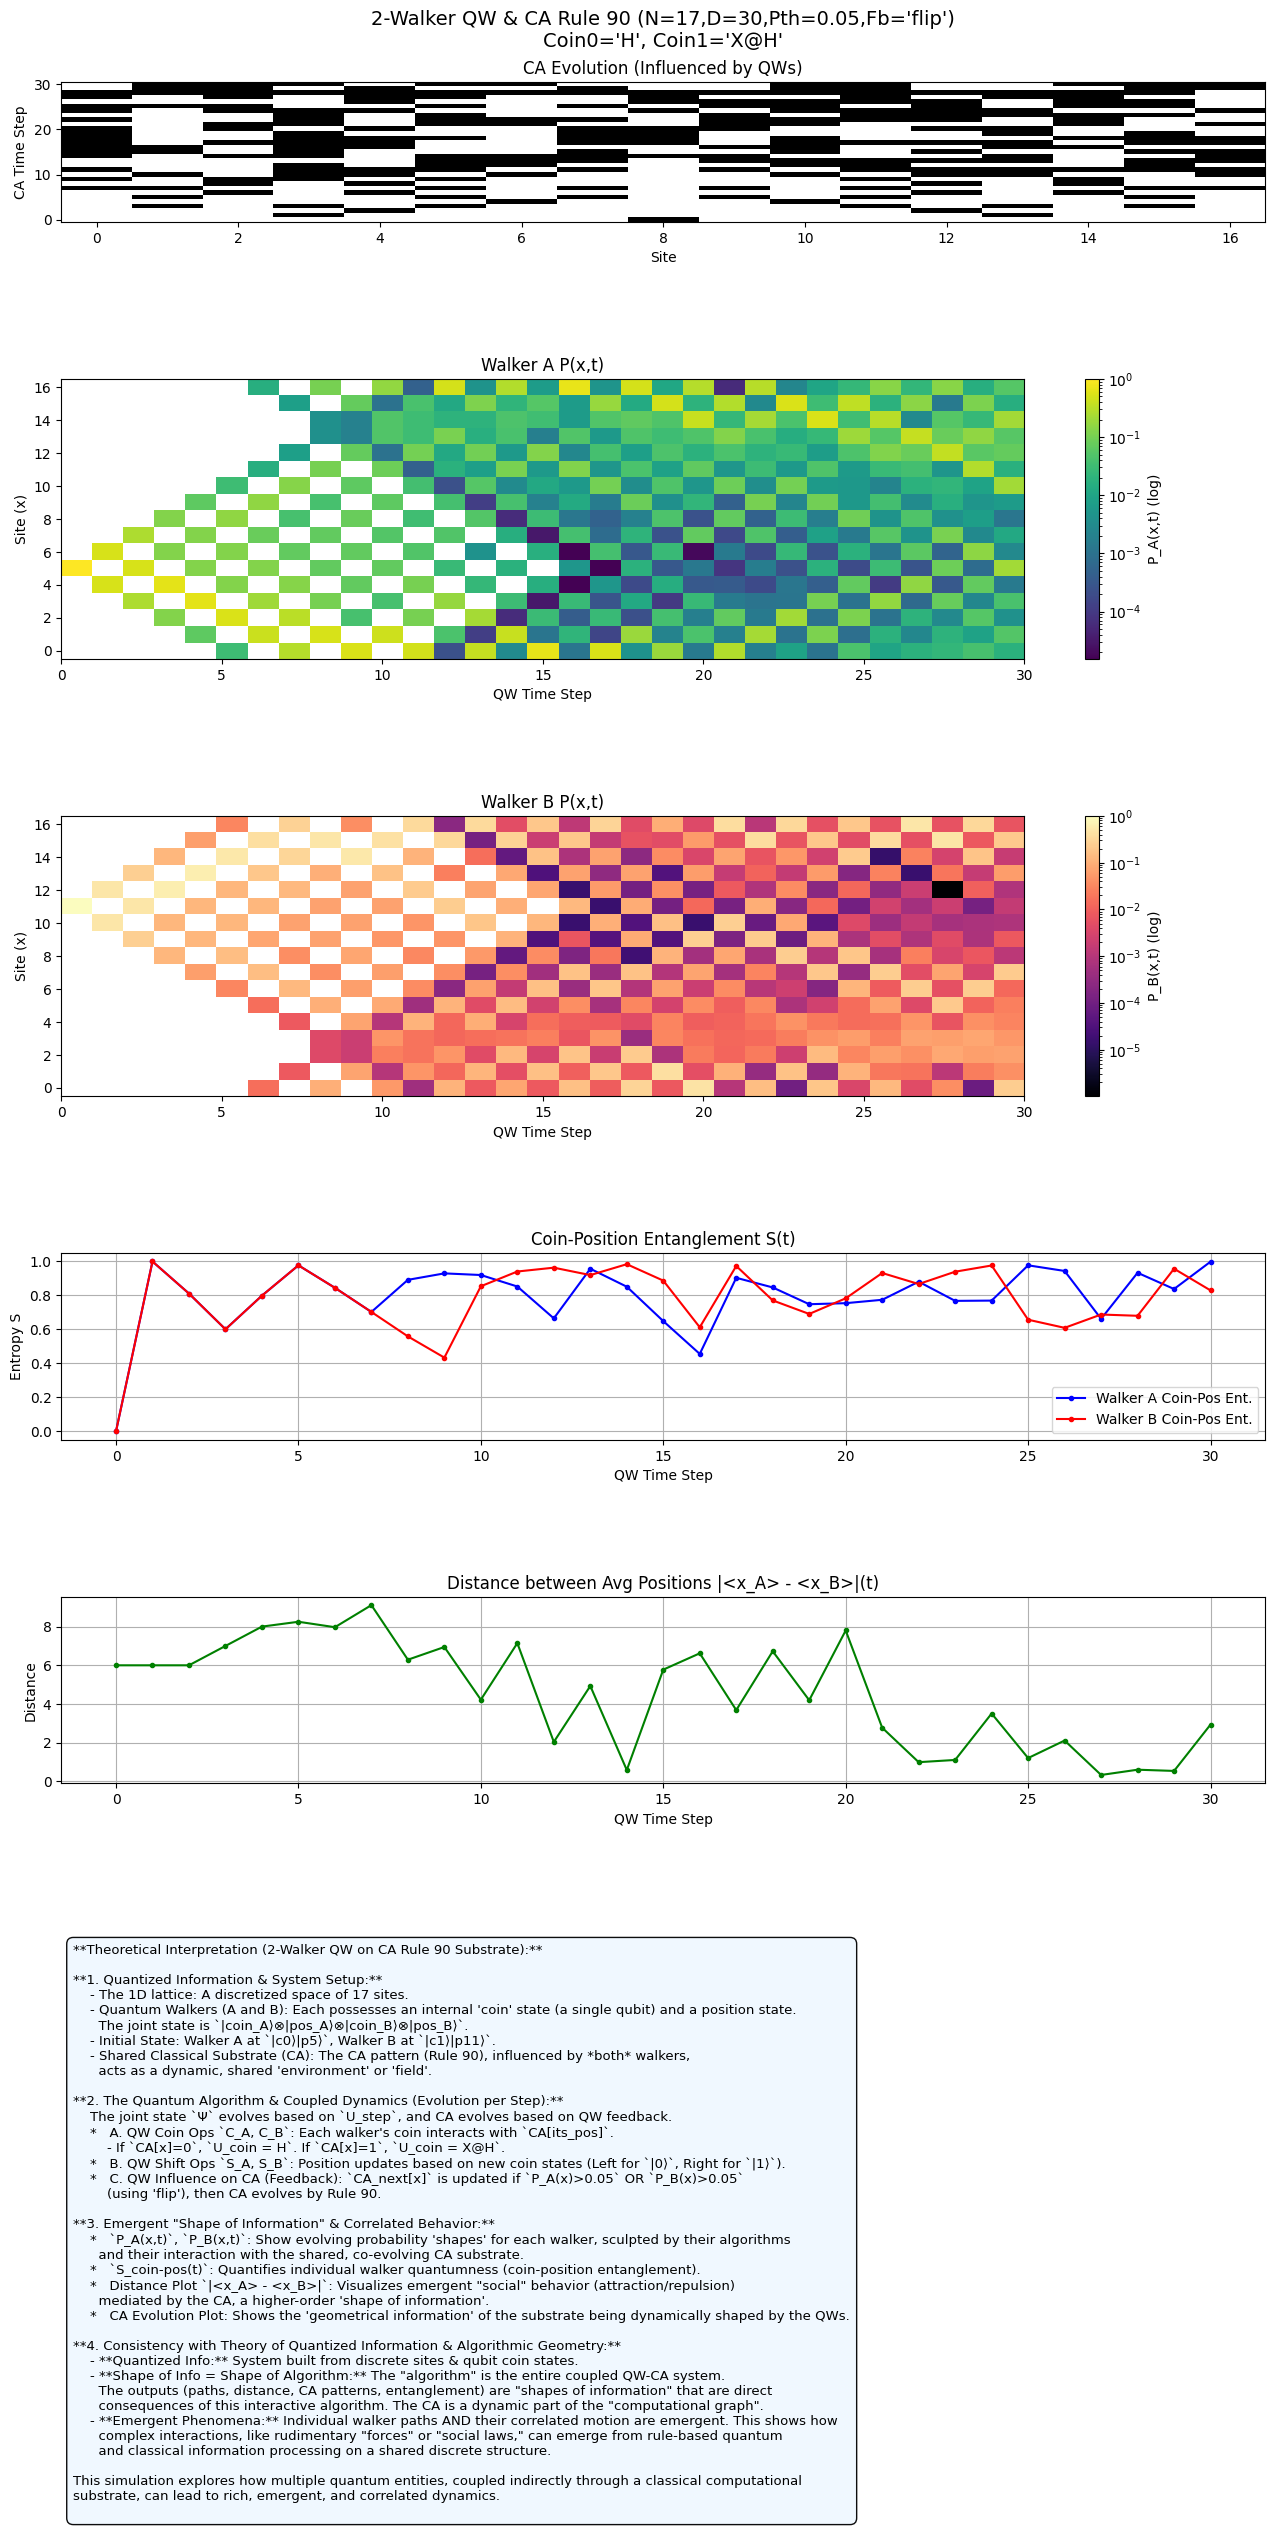


===== Running 2-Walker Simulation with CA Rule 110 =====
Initialized Walker A at (5, c0), Walker B at (11, c1) Index: 792

Starting 2-Walker 1D QW (CA Rule 110) for 30 steps...
  2W-QW Step 6/30 completed. S(A)=0.845, S(B)=0.977
  2W-QW Step 12/30 completed. S(A)=0.806, S(B)=0.652
  2W-QW Step 18/30 completed. S(A)=0.716, S(B)=0.482
  2W-QW Step 24/30 completed. S(A)=0.822, S(B)=0.707
  2W-QW Step 30/30 completed. S(A)=0.799, S(B)=0.873
2-Walker QW Evolution complete. Time: 92.42 seconds.
**Theoretical Interpretation (2-Walker QW on CA Rule 110 Substrate):**

**1. Quantized Information & System Setup:**
    - The 1D lattice: A discretized space of 17 sites.
    - Quantum Walkers (A and B): Each possesses an internal 'coin' state (a single qubit) and a position state. 
      The joint state is `|coin_A⟩⊗|pos_A⟩⊗|coin_B⟩⊗|pos_B⟩`.
    - Initial State: Walker A at `|c0⟩|p5⟩`, Walker B at `|c1⟩|p11⟩`.
    - Shared Classical Substrate (CA): The CA pattern (Rule 110), influenced by *both* w

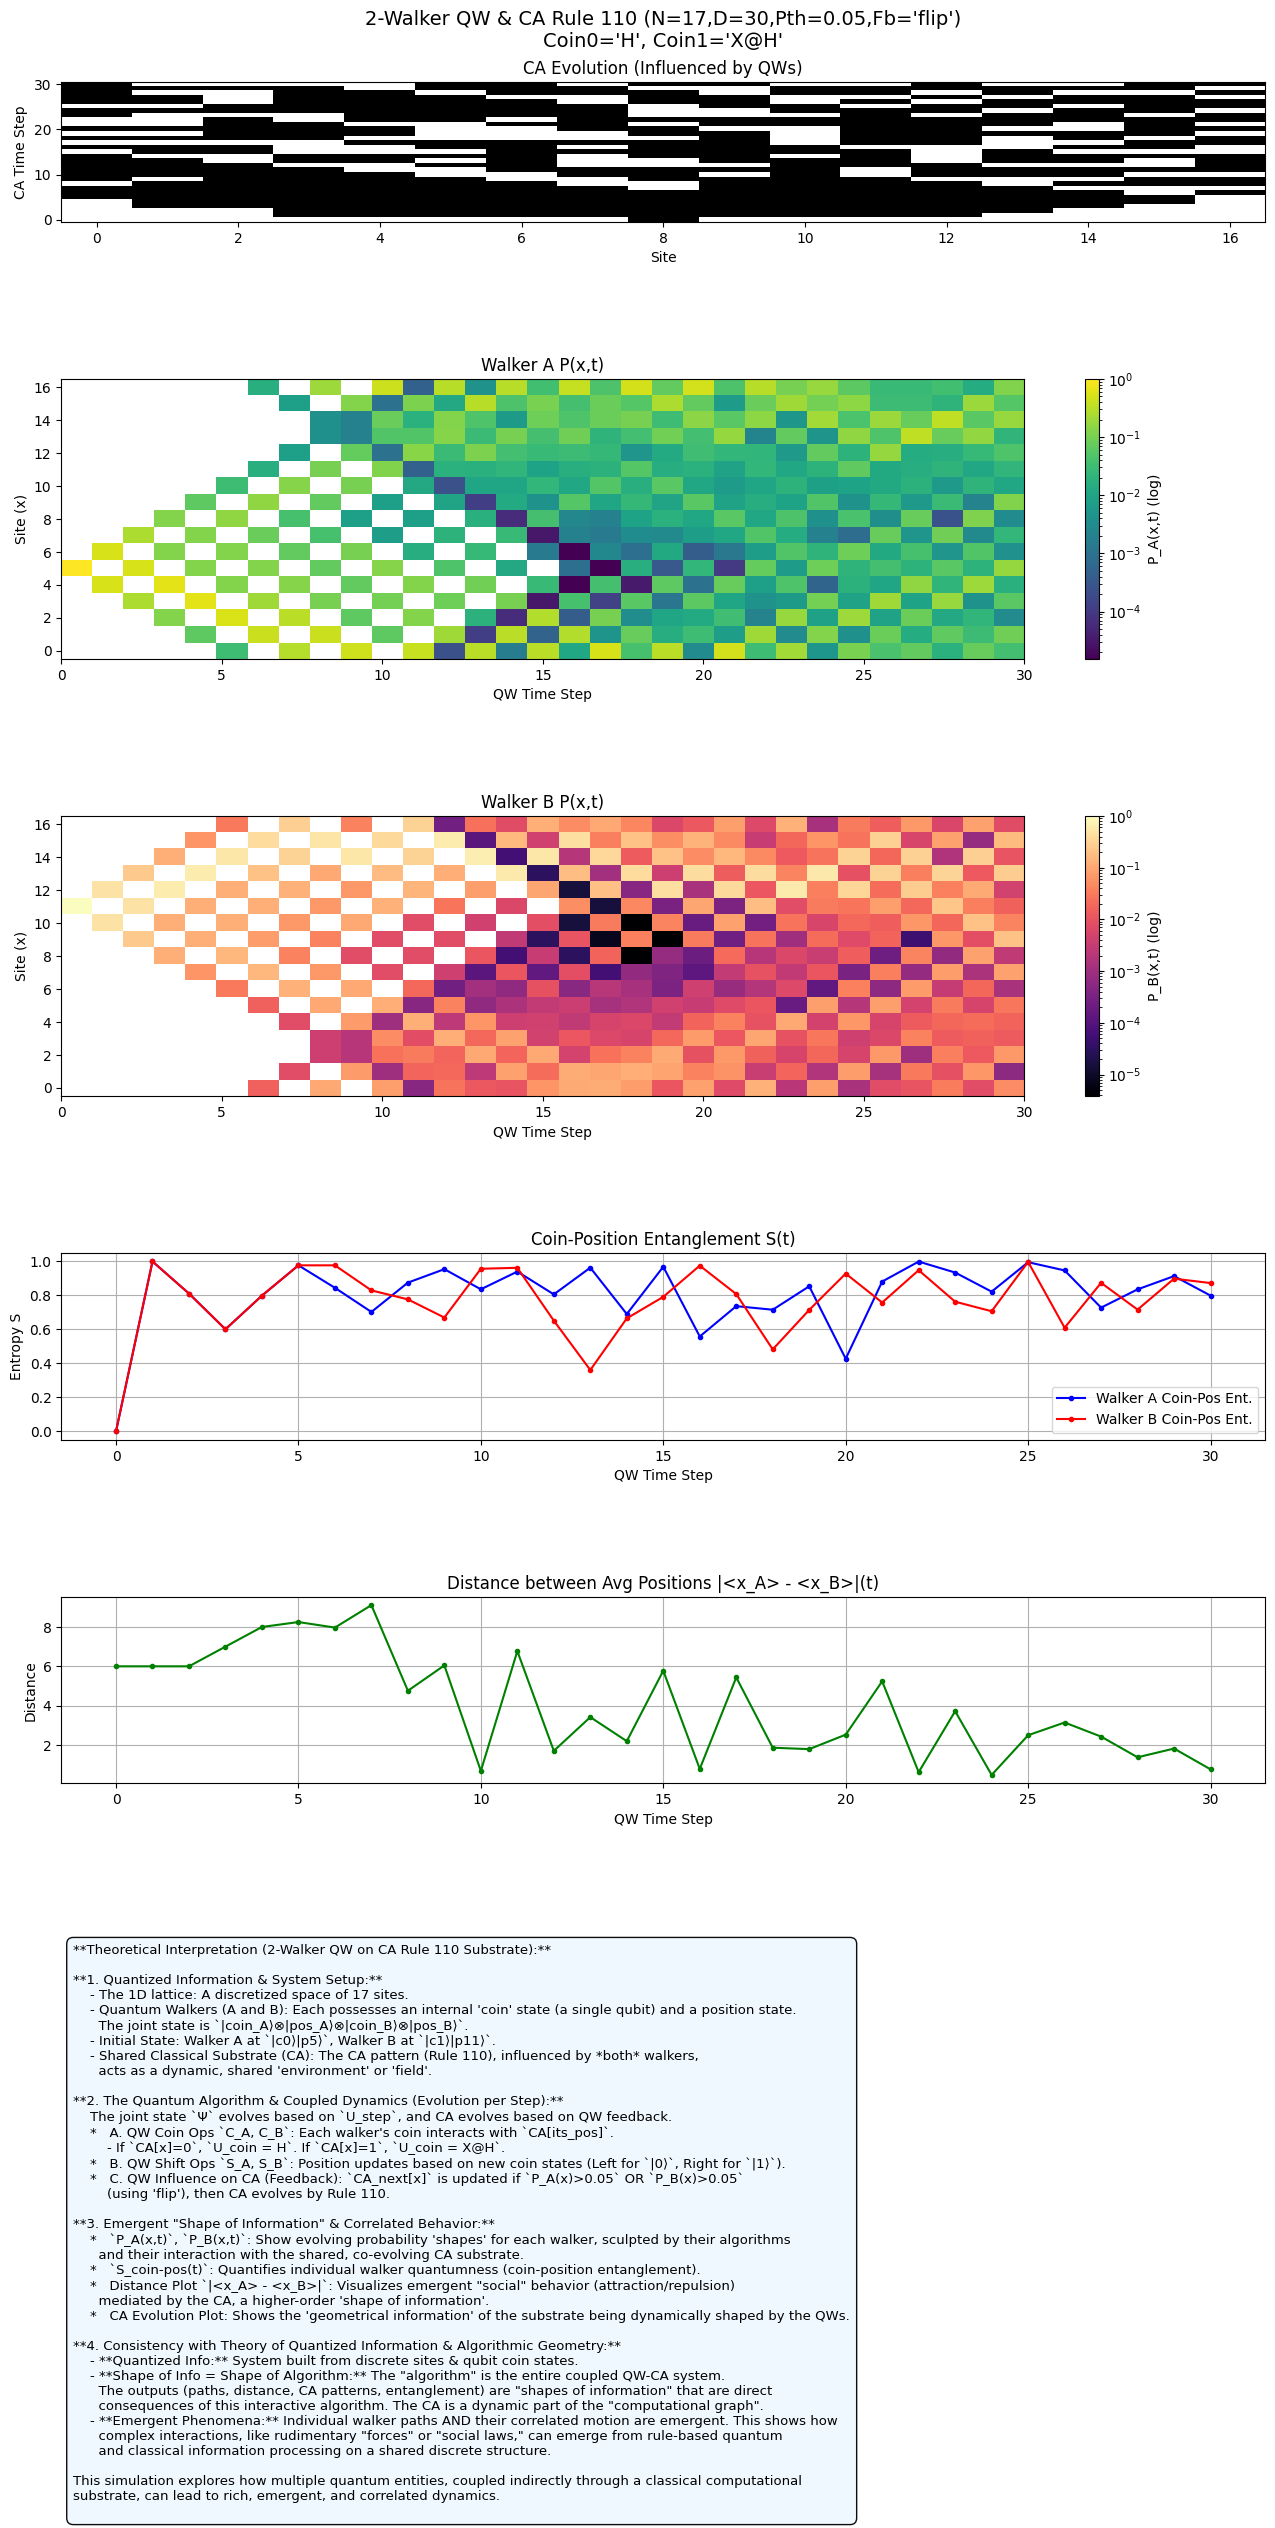



<<<<< ALL 2-WALKER SIMULATION TEXT OUTPUTS (WITH THEORY) >>>>>
**Theoretical Interpretation (2-Walker QW on CA Rule 30 Substrate):**

**1. Quantized Information & System Setup:**
    - The 1D lattice: A discretized space of 17 sites.
    - Quantum Walkers (A and B): Each possesses an internal 'coin' state (a single qubit) and a position state. 
      The joint state is `|coin_A⟩⊗|pos_A⟩⊗|coin_B⟩⊗|pos_B⟩`.
    - Initial State: Walker A at `|c0⟩|p5⟩`, Walker B at `|c1⟩|p11⟩`.
    - Shared Classical Substrate (CA): The CA pattern (Rule 30), influenced by *both* walkers, 
      acts as a dynamic, shared 'environment' or 'field'.

**2. The Quantum Algorithm & Coupled Dynamics (Evolution per Step):**
    The joint state `Ψ` evolves based on `U_step`, and CA evolves based on QW feedback.
    *   A. QW Coin Ops `C_A, C_B`: Each walker's coin interacts with `CA[its_pos]`.
        - If `CA[x]=0`, `U_coin = H`. If `CA[x]=1`, `U_coin = X@H`.
    *   B. QW Shift Ops `S_A, S_B`: Position updates b

In [4]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import time
import zlib

# --- Parameters ---
N_SITES_1D = 17 # To match your output run
DEPTH = 30      # To match your output run
INITIAL_POS_A = N_SITES_1D // 2 - N_SITES_1D // 5 # Approx 5 - 2 = 3
INITIAL_POS_B = N_SITES_1D // 2 + N_SITES_1D // 5 # Approx 5 + 2 = 7
INITIAL_COIN_A = 0
INITIAL_COIN_B = 1
INITIAL_CA_CENTER_ONE = True
P_THRESHOLD_FEEDBACK = 0.05
FEEDBACK_TYPE = "flip"

# --- CA Rule Update Function ---
def update_ca_line(current_line, rule_number):
    width = len(current_line); new_line = np.zeros(width, dtype=int)
    for i in range(width):
        pattern_val = (current_line[(i-1+width)%width]<<2)|(current_line[i]<<1)|current_line[(i+1)%width]
        if rule_number==30: new_line[i]=1 if pattern_val in [1,2,3,4] else 0
        elif rule_number==90: new_line[i]=1 if current_line[(i-1+width)%width]!=current_line[(i+1)%width] else 0
        elif rule_number==110: new_line[i]=1 if pattern_val in [1,2,3,5,6] else 0
        else: raise ValueError(f"Rule {rule_number} not implemented.")
    return new_line

# --- Coin Matrices & Rz Gate ---
H_1Q = (1/np.sqrt(2))*np.array([[1,1],[1,-1]],dtype=np.complex128)
X_1Q = np.array([[0,1],[1,0]],dtype=np.complex128)
I_1Q = np.eye(2,dtype=np.complex128)
COIN0_OP_DEFAULT = H_1Q
COIN1_OP_DEFAULT = X_1Q @ H_1Q

# --- Helper Functions (1D QW - Single Walker Indexing) ---
def get_1d_index(coin_val, site_pos, n_sites_1d):
    if not (0 <= site_pos < n_sites_1d and 0 <= coin_val <= 1):
        raise IndexError(f"Invalid coin ({coin_val}) or pos ({site_pos}) for 1D index (N_sites={n_sites_1d})")
    return coin_val + 2 * site_pos

def get_1d_coin_pos_from_index(k, n_sites_1d):
    state_dim_1d = 2 * n_sites_1d
    if not (0 <= k < state_dim_1d):
        raise IndexError(f"Invalid k ({k}) for 1D coin/pos (StateDim={state_dim_1d})")
    coin_val = k % 2
    site_pos = k // 2
    return coin_val, site_pos

# --- Helper Functions (2 Walkers on 1D Grid) ---
def get_2walker_index(cA, pA, cB, pB, n_sites_1d):
    d_1w = 2 * n_sites_1d
    idx_A = get_1d_index(cA, pA, n_sites_1d)
    idx_B = get_1d_index(cB, pB, n_sites_1d)
    if not (0 <= idx_A < d_1w and 0 <= idx_B < d_1w):
        raise IndexError(f"Internal 1D index out of bounds during 2-walker indexing.")
    return idx_A + d_1w * idx_B

def get_2walker_coords_from_index(k, n_sites_1d):
    d_1w = 2 * n_sites_1d
    d_tot = d_1w * d_1w
    if not (0 <= k < d_tot):
        raise IndexError(f"Invalid k ({k}) for 2-walker (Dim={d_tot})")
    idx_A = k % d_1w
    idx_B = k // d_1w
    cA, pA = get_1d_coin_pos_from_index(idx_A, n_sites_1d)
    cB, pB = get_1d_coin_pos_from_index(idx_B, n_sites_1d)
    return cA, pA, cB, pB

# --- Initial State Preparation ---
def prepare_initial_state_2walkers(n_sites_1d, pA_init, cA_init, pB_init, cB_init):
    d_1w = 2 * n_sites_1d
    state_dim_2w = d_1w * d_1w
    initial_state_vector = np.zeros(state_dim_2w, dtype=np.complex128)
    try:
        start_idx = get_2walker_index(cA_init, pA_init, cB_init, pB_init, n_sites_1d)
        initial_state_vector[start_idx] = 1.0
        print(f"Initialized Walker A at ({pA_init}, c{cA_init}), Walker B at ({pB_init}, c{cB_init}) Index: {start_idx}")
    except IndexError as e:
        print(f"Error during 2-walker initial state prep: {e}")
    return initial_state_vector

# --- Build Single Walker Operators ---
def build_single_qw_coin_matrix_for_site(current_ca_pattern_site_val, coin0_op, coin1_op):
    return coin0_op if current_ca_pattern_site_val == 0 else coin1_op

def build_single_qw_shift_matrix(n_sites_1d):
    d_1w = 2 * n_sites_1d
    S_1w = np.zeros((d_1w, d_1w), dtype=np.complex128)
    for k_in_1w in range(d_1w):
        coin_val, site_pos = get_1d_coin_pos_from_index(k_in_1w, n_sites_1d)
        new_pos = (site_pos - 1 + n_sites_1d) % n_sites_1d if coin_val == 0 else (site_pos + 1) % n_sites_1d
        k_out_1w = get_1d_index(coin_val, new_pos, n_sites_1d)
        S_1w[k_out_1w, k_in_1w] = 1.0
    return S_1w

# --- Build Full QW Step Operator for 2 Walkers ---
def build_2walker_qw_step_operator(n_sites_1d, current_ca_pattern, coin0_op, coin1_op):
    d_1w = 2 * n_sites_1d
    state_dim_2w = d_1w * d_1w

    S_A_1w = build_single_qw_shift_matrix(n_sites_1d)
    S_A_global = np.kron(S_A_1w, np.eye(d_1w, dtype=np.complex128))
    S_B_1w = build_single_qw_shift_matrix(n_sites_1d)
    S_B_global = np.kron(np.eye(d_1w, dtype=np.complex128), S_B_1w)

    U_Coin_A = np.zeros((state_dim_2w, state_dim_2w), dtype=np.complex128)
    U_Coin_B = np.zeros((state_dim_2w, state_dim_2w), dtype=np.complex128)

    for k_in_joint in range(state_dim_2w):
        cA_in, pA_in, cB_in, pB_in = get_2walker_coords_from_index(k_in_joint, n_sites_1d)

        coin_matrix_for_A = build_single_qw_coin_matrix_for_site(current_ca_pattern[pA_in], coin0_op, coin1_op)
        for cA_out in range(2):
            amplitude_A = coin_matrix_for_A[cA_out, cA_in]
            if np.abs(amplitude_A) > 1e-9:
                k_out_joint_for_A_op = get_2walker_index(cA_out, pA_in, cB_in, pB_in, n_sites_1d)
                U_Coin_A[k_out_joint_for_A_op, k_in_joint] = amplitude_A

        coin_matrix_for_B = build_single_qw_coin_matrix_for_site(current_ca_pattern[pB_in], coin0_op, coin1_op)
        for cB_out in range(2):
            amplitude_B = coin_matrix_for_B[cB_out, cB_in]
            if np.abs(amplitude_B) > 1e-9:
                k_out_joint_for_B_op = get_2walker_index(cA_in, pA_in, cB_out, pB_in, n_sites_1d)
                U_Coin_B[k_out_joint_for_B_op, k_in_joint] = amplitude_B

    U_step = S_B_global @ S_A_global @ U_Coin_B @ U_Coin_A
    return U_step

# --- Observables (2 Walkers) ---
def calculate_p1_pos_2walkers(joint_sv, n_sites_1d, walker_id='A'):
    d_1w = 2 * n_sites_1d; d_tot = d_1w * d_1w
    probs_1d = np.zeros(n_sites_1d)
    if len(joint_sv) != d_tot: return probs_1d

    for k_joint in range(d_tot):
        cA, pA, cB, pB = get_2walker_coords_from_index(k_joint, n_sites_1d)
        amp_sq = np.abs(joint_sv[k_joint])**2
        if walker_id == 'A': probs_1d[pA] += amp_sq
        elif walker_id == 'B': probs_1d[pB] += amp_sq
    return probs_1d

def calculate_coin_entanglement_2walkers(joint_sv, n_sites_1d, walker_id='A'):
    d_1w = 2 * n_sites_1d; d_tot = d_1w * d_1w; coin_dim = 2
    if len(joint_sv) != d_tot: return np.nan

    norm = np.linalg.norm(joint_sv)
    if norm < 1e-9: return 0.0
    if np.abs(norm - 1.0) > 1e-6: joint_sv = joint_sv / norm

    rho_full = np.outer(joint_sv, np.conjugate(joint_sv))
    rho_coin_walker = np.zeros((coin_dim, coin_dim), dtype=np.complex128)

    for k_joint_row in range(d_tot):
        cA_r, pA_r, cB_r, pB_r = get_2walker_coords_from_index(k_joint_row, n_sites_1d)
        for k_joint_col in range(d_tot):
            cA_c, pA_c, cB_c, pB_c = get_2walker_coords_from_index(k_joint_col, n_sites_1d)
            if walker_id == 'A':
                if pA_r == pA_c and cB_r == cB_c and pB_r == pB_c:
                    rho_coin_walker[cA_r, cA_c] += rho_full[k_joint_row, k_joint_col]
            elif walker_id == 'B':
                if cA_r == cA_c and pA_r == pA_c and pB_r == pB_c:
                     rho_coin_walker[cB_r, cB_c] += rho_full[k_joint_row, k_joint_col]

    tr = np.trace(rho_coin_walker)
    if abs(tr) < 1e-9: return 0.0
    if np.abs(tr - 1.0) > 1e-6: rho_coin_walker /= tr

    eigs = np.linalg.eigvalsh(rho_coin_walker); ent = 0.0; epsilon = 1e-12
    for e_val in eigs: ent -= (e_val * np.log2(e_val) if e_val > epsilon else 0.0)
    return max(0.0, np.real(ent))

# --- Simulation Loop ---
def run_1d_qw_2walkers_two_way_coupling(
    n_sites_1d, depth, pA_init, cA_init, pB_init, cB_init,
    initial_ca_center_one, ca_rule_number, coin0_op, coin1_op,
    p_threshold, feedback_type
):
    current_qw_state = prepare_initial_state_2walkers(n_sites_1d, pA_init, cA_init, pB_init, cB_init)
    current_ca_line = np.zeros(n_sites_1d, dtype=int)
    if initial_ca_center_one and n_sites_1d > 0:
        center_idx = n_sites_1d // 2
        if n_sites_1d % 2 == 1: current_ca_line[center_idx] = 1
        else: current_ca_line[center_idx - 1] = 1

    prob_A_hist = np.full((depth + 1, n_sites_1d), np.nan)
    prob_B_hist = np.full((depth + 1, n_sites_1d), np.nan)
    ent_A_hist = np.full(depth + 1, np.nan)
    ent_B_hist = np.full(depth + 1, np.nan)
    ca_hist_2w = [current_ca_line.copy()]

    prob_A_hist[0, :] = calculate_p1_pos_2walkers(current_qw_state, n_sites_1d, 'A')
    prob_B_hist[0, :] = calculate_p1_pos_2walkers(current_qw_state, n_sites_1d, 'B')
    ent_A_hist[0] = calculate_coin_entanglement_2walkers(current_qw_state, n_sites_1d, 'A')
    ent_B_hist[0] = calculate_coin_entanglement_2walkers(current_qw_state, n_sites_1d, 'B')

    print(f"\nStarting 2-Walker 1D QW (CA Rule {ca_rule_number}) for {depth} steps...")
    start_time = time.time()

    for step in range(depth):
        U_step = build_2walker_qw_step_operator(n_sites_1d, current_ca_line, coin0_op, coin1_op)
        current_qw_state = U_step @ current_qw_state
        norm_qw = np.linalg.norm(current_qw_state)
        if abs(norm_qw) > 1e-9 : current_qw_state /= norm_qw
        else: print(f"Warning: QW Norm zero at step {step+1}."); break

        pA_current = calculate_p1_pos_2walkers(current_qw_state, n_sites_1d, 'A')
        pB_current = calculate_p1_pos_2walkers(current_qw_state, n_sites_1d, 'B')
        prob_A_hist[step + 1, :] = pA_current
        prob_B_hist[step + 1, :] = pB_current
        ent_A_hist[step+1] = calculate_coin_entanglement_2walkers(current_qw_state, n_sites_1d, 'A')
        ent_B_hist[step+1] = calculate_coin_entanglement_2walkers(current_qw_state, n_sites_1d, 'B')

        ca_line_for_next_update = current_ca_line.copy()
        for i in range(n_sites_1d):
            if pA_current[i] > p_threshold or pB_current[i] > p_threshold:
                if feedback_type=="flip": ca_line_for_next_update[i]=1-ca_line_for_next_update[i]
                elif feedback_type=="set_to_one": ca_line_for_next_update[i]=1
                elif feedback_type=="set_to_zero": ca_line_for_next_update[i]=0
        current_ca_line = update_ca_line(ca_line_for_next_update, ca_rule_number)
        ca_hist_2w.append(current_ca_line.copy())

        if (step + 1) % (max(1, depth // 5)) == 0 or step == depth -1 :
            print(f"  2W-QW Step {step + 1}/{depth} completed. "
                  f"S(A)={ent_A_hist[step+1] if np.isfinite(ent_A_hist[step+1]) else 'NaN':.3f}, "
                  f"S(B)={ent_B_hist[step+1] if np.isfinite(ent_B_hist[step+1]) else 'NaN':.3f}")

    end_time = time.time()
    print(f"2-Walker QW Evolution complete. Time: {end_time - start_time:.2f} seconds.")

    return {
        "prob_A_hist": prob_A_hist, "prob_B_hist": prob_B_hist,
        "ent_A_hist": ent_A_hist, "ent_B_hist": ent_B_hist,
        "ca_history": np.array(ca_hist_2w),
        "params": { "n_sites":n_sites_1d,"depth":depth, "ca_rule":ca_rule_number,
                    "pA_init":pA_init, "cA_init":cA_init, "pB_init":pB_init, "cB_init":cB_init,
                    "p_thresh":p_threshold, "feedback":feedback_type,
                    "coin0_name": "H" if np.allclose(coin0_op, H_1Q) else "X@H",
                    "coin1_name": "X@H" if np.allclose(coin1_op, X_1Q@H_1Q) else ("H" if np.allclose(coin1_op, H_1Q) else "Other")
                   }
    }

# --- Plotting and Summary for 2 Walkers with Theory Text ---
def plot_2walker_results_with_theory(results, theory_explanation_text):
    params = results["params"]; pA = results["prob_A_hist"]; pB = results["prob_B_hist"]
    eA = results["ent_A_hist"]; eB = results["ent_B_hist"]; ca_h = results["ca_history"]
    n_sites = params["n_sites"]; depth = params["depth"]

    fig = plt.figure(figsize=(14, 24)) # Increased height for theory text
    gs = gridspec.GridSpec(6, 1, height_ratios=[1.5, 3, 3, 2, 2, 4.0], hspace=0.65) # Adjusted ratios

    title_str = (f"2-Walker QW & CA Rule {params['ca_rule']} (N={n_sites},D={depth},Pth={params['p_thresh']:.2f},Fb='{params['feedback']}')\n"
                 f"Coin0='{params['coin0_name']}', Coin1='{params['coin1_name']}'")
    fig.suptitle(title_str, fontsize=14)

    # Plot 1: CA Evolution
    ax_ca = fig.add_subplot(gs[0])
    ca_time_extent = [-0.5, n_sites - 0.5, -0.5, ca_h.shape[0] - 0.5]
    ax_ca.imshow(ca_h,cmap='binary',aspect='auto',interpolation='nearest', extent=ca_time_extent, origin='lower');
    ax_ca.set_title("CA Evolution (Influenced by QWs)"); ax_ca.set_xlabel("Site"); ax_ca.set_ylabel("CA Time Step") # Changed y label

    # Plot 2: Walker A P(x,t)
    ax_pA = fig.add_subplot(gs[1])
    time_extent_qw = [0, depth, -0.5, n_sites-0.5]
    prob_st_A=pA.T;pos_pA=prob_st_A[prob_st_A>1e-9];min_vA=pos_pA.min() if len(pos_pA)>0 else 1e-9;max_vA=prob_st_A.max()
    norm_vA=colors.LogNorm(vmin=min_vA,vmax=max(max_vA,min_vA+1e-7) if max_vA > min_vA else min_vA + 1e-7 )
    imA=ax_pA.imshow(prob_st_A,aspect='auto',origin='lower',cmap='viridis',norm=norm_vA,extent=time_extent_qw)
    plt.colorbar(imA,ax=ax_pA,label="P_A(x,t) (log)");ax_pA.set_title("Walker A P(x,t)");ax_pA.set_xlabel("QW Time Step");ax_pA.set_ylabel("Site (x)")

    # Plot 3: Walker B P(x,t)
    ax_pB = fig.add_subplot(gs[2])
    prob_st_B=pB.T;pos_pB=prob_st_B[prob_st_B>1e-9];min_vB=pos_pB.min() if len(pos_pB)>0 else 1e-9;max_vB=prob_st_B.max()
    norm_vB=colors.LogNorm(vmin=min_vB,vmax=max(max_vB,min_vB+1e-7) if max_vB > min_vB else min_vB + 1e-7)
    imB=ax_pB.imshow(prob_st_B,aspect='auto',origin='lower',cmap='magma',norm=norm_vB,extent=time_extent_qw)
    plt.colorbar(imB,ax=ax_pB,label="P_B(x,t) (log)");ax_pB.set_title("Walker B P(x,t)");ax_pB.set_xlabel("QW Time Step");ax_pB.set_ylabel("Site (x)")

    # Plot 4: Entanglement
    ax_ent = fig.add_subplot(gs[3])
    ts=np.arange(depth+1)
    ax_ent.plot(ts,eA,marker='.',ls='-',color='blue',label='Walker A Coin-Pos Ent.'); ax_ent.plot(ts,eB,marker='.',ls='-',color='red',label='Walker B Coin-Pos Ent.')
    ax_ent.set_title("Coin-Position Entanglement S(t)");ax_ent.set_xlabel("QW Time Step");ax_ent.set_ylabel("Entropy S");ax_ent.grid(True);ax_ent.legend();ax_ent.set_ylim(bottom=-0.05,top=1.05)

    # Plot 5: Distance
    ax_dist = fig.add_subplot(gs[4])
    avg_pos_A = np.array([np.sum(pA[t,:] * np.arange(n_sites)) / np.sum(pA[t,:]) if np.sum(pA[t,:]) > 1e-9 else np.nan for t in range(depth+1)])
    avg_pos_B = np.array([np.sum(pB[t,:] * np.arange(n_sites)) / np.sum(pB[t,:]) if np.sum(pB[t,:]) > 1e-9 else np.nan for t in range(depth+1)])
    distance = np.abs(avg_pos_A - avg_pos_B)
    ax_dist.plot(ts, distance, marker='.', ls='-', color='green')
    ax_dist.set_title("Distance between Avg Positions |<x_A> - <x_B>|(t)"); ax_dist.set_xlabel("QW Time Step"); ax_dist.set_ylabel("Distance"); ax_dist.grid(True)

    # Plot 6: Theory Text
    ax_theory = fig.add_subplot(gs[5])
    ax_theory.text(0.01, 0.99, theory_explanation_text, transform=ax_theory.transAxes, fontsize=9.5,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='aliceblue', alpha=0.95))
    ax_theory.axis('off')

    fig.subplots_adjust(top=0.95, bottom=0.02, left=0.07, right=0.93, hspace=0.8) # Adjusted hspace and top
    plt.show()

def get_theory_explanation_text_2walkers(params_dict):
    ca_rule = params_dict["ca_rule"]
    n_sites = params_dict["n_sites"]
    pA_init = params_dict["pA_init"]; cA_init = params_dict["cA_init"]
    pB_init = params_dict["pB_init"]; cB_init = params_dict["cB_init"]
    coin0_name = params_dict.get("coin0_name", "COIN0_OP_DEFAULT")
    coin1_name = params_dict.get("coin1_name", "COIN1_OP_DEFAULT")
    feedback_type = params_dict["feedback"]; p_threshold = params_dict["p_thresh"]
    return f"""**Theoretical Interpretation (2-Walker QW on CA Rule {ca_rule} Substrate):**

**1. Quantized Information & System Setup:**
    - The 1D lattice: A discretized space of {n_sites} sites.
    - Quantum Walkers (A and B): Each possesses an internal 'coin' state (a single qubit) and a position state.
      The joint state is `|coin_A⟩⊗|pos_A⟩⊗|coin_B⟩⊗|pos_B⟩`.
    - Initial State: Walker A at `|c{cA_init}⟩|p{pA_init}⟩`, Walker B at `|c{cB_init}⟩|p{pB_init}⟩`.
    - Shared Classical Substrate (CA): The CA pattern (Rule {ca_rule}), influenced by *both* walkers,
      acts as a dynamic, shared 'environment' or 'field'.

**2. The Quantum Algorithm & Coupled Dynamics (Evolution per Step):**
    The joint state `Ψ` evolves based on `U_step`, and CA evolves based on QW feedback.
    *   A. QW Coin Ops `C_A, C_B`: Each walker's coin interacts with `CA[its_pos]`.
        - If `CA[x]=0`, `U_coin = {coin0_name}`. If `CA[x]=1`, `U_coin = {coin1_name}`.
    *   B. QW Shift Ops `S_A, S_B`: Position updates based on new coin states (Left for `|0⟩`, Right for `|1⟩`).
    *   C. QW Influence on CA (Feedback): `CA_next[x]` is updated if `P_A(x)>{p_threshold:.2f}` OR `P_B(x)>{p_threshold:.2f}`
        (using '{feedback_type}'), then CA evolves by Rule {ca_rule}.

**3. Emergent "Shape of Information" & Correlated Behavior:**
    *   `P_A(x,t)`, `P_B(x,t)`: Show evolving probability 'shapes' for each walker, sculpted by their algorithms
      and their interaction with the shared, co-evolving CA substrate.
    *   `S_coin-pos(t)`: Quantifies individual walker quantumness (coin-position entanglement).
    *   Distance Plot `|<x_A> - <x_B>|`: Visualizes emergent "social" behavior (attraction/repulsion)
      mediated by the CA, a higher-order 'shape of information'.
    *   CA Evolution Plot: Shows the 'geometrical information' of the substrate being dynamically shaped by the QWs.

**4. Consistency with Theory of Quantized Information & Algorithmic Geometry:**
    - **Quantized Info:** System built from discrete sites & qubit coin states.
    - **Shape of Info = Shape of Algorithm:** The "algorithm" is the entire coupled QW-CA system.
      The outputs (paths, distance, CA patterns, entanglement) are "shapes of information" that are direct
      consequences of this interactive algorithm. The CA is a dynamic part of the "computational graph".
    - **Emergent Phenomena:** Individual walker paths AND their correlated motion are emergent. This shows how
      complex interactions, like rudimentary "forces" or "social laws," can emerge from rule-based quantum
      and classical information processing on a shared discrete structure.

This simulation explores how multiple quantum entities, coupled indirectly through a classical computational
substrate, can lead to rich, emergent, and correlated dynamics.
"""

# Renamed the old summary function to avoid conflict if it was still present
def generate_2walker_numerical_summary(results):
    params = results["params"]; pA = results["prob_A_hist"]; pB = results["prob_B_hist"]
    eA = results["ent_A_hist"]; eB = results["ent_B_hist"]
    output_lines = [f"\n--- 2-Walker QW (CA Rule {params['ca_rule']}) Numerical Summary ---"]
    output_lines.append(f"N_sites={params['n_sites']}, Depth={params['depth']}, Pth={params['p_thresh']:.2f}, Fb='{params['feedback']}'")
    output_lines.append(f"  Walker A: StartPos={params['pA_init']}, StartCoin={params['cA_init']}")
    output_lines.append(f"  Walker B: StartPos={params['pB_init']}, StartCoin={params['cB_init']}")

    for walker_label, p_hist, e_hist in [("A", pA, eA), ("B", pB, eB)]:
        output_lines.append(f"\nWalker {walker_label} - Top 5 Final Probabilities (Site: Prob):")
        if p_hist.ndim == 2 and p_hist.shape[0] > 0:
            final_probs = p_hist[-1, :]
            if not np.isnan(final_probs).all():
                sorted_indices = np.argsort(final_probs)[::-1]
                count = 0
                for i_idx in range(min(5, params['n_sites'])):
                    idx = sorted_indices[i_idx]
                    if np.isfinite(final_probs[idx]):
                        output_lines.append(f"  Site {idx}: {final_probs[idx]:.5f}"); count+=1
                if count == 0: output_lines.append("  (Probabilities are NaN or zero)")
            else: output_lines.append("  (Final probabilities are all NaN)")
        else: output_lines.append("  (Probability history not available or malformed)")

        output_lines.append(f"Walker {walker_label} - Coin-Position Entanglement vs. Time:")
        num_steps = len(e_hist)
        indices_show = [0] + ([num_steps // 2] if num_steps > 2 else []) + ([num_steps - 1] if num_steps > 1 else [])
        for idx_show in sorted(list(set(indices_show))):
            if 0 <= idx_show < len(e_hist):
                 s_str = f"{e_hist[idx_show]:.6f}" if np.isfinite(e_hist[idx_show]) else "nan"; output_lines.append(f"  Step {idx_show}: S = {s_str}")
            else: output_lines.append(f"  Step {idx_show}: S = (Index out of bounds)")
    output_lines.append("--- End Numerical Summary ---")
    return "\n".join(output_lines)


# --- Main Execution ---
if __name__ == "__main__":
    ca_rules_to_run_2w = [30, 90, 110]

    print(f"Starting 2-Walker QW with CA-coupled coin (N_sites={N_SITES_1D}, Depth={DEPTH})...")
    all_text_outputs_2w = []

    for ca_r in ca_rules_to_run_2w:
        print(f"\n===== Running 2-Walker Simulation with CA Rule {ca_r} =====")
        results_2w = run_1d_qw_2walkers_two_way_coupling(
            n_sites_1d=N_SITES_1D, depth=DEPTH,
            pA_init=INITIAL_POS_A, cA_init=INITIAL_COIN_A,
            pB_init=INITIAL_POS_B, cB_init=INITIAL_COIN_B,
            initial_ca_center_one=INITIAL_CA_CENTER_ONE,
            ca_rule_number=ca_r,
            coin0_op=COIN0_OP_DEFAULT, coin1_op=COIN1_OP_DEFAULT,
            p_threshold=P_THRESHOLD_FEEDBACK, feedback_type=FEEDBACK_TYPE
        )

        theory_text_2w = get_theory_explanation_text_2walkers(results_2w["params"])
        print(theory_text_2w) # Print theory text to console for this run

        plot_2walker_results_with_theory(results_2w, theory_text_2w)

        numerical_summary_text = generate_2walker_numerical_summary(results_2w)
        all_text_outputs_2w.append(theory_text_2w + "\n" + numerical_summary_text)

    print("\n\n<<<<< ALL 2-WALKER SIMULATION TEXT OUTPUTS (WITH THEORY) >>>>>")
    for output in all_text_outputs_2w:
        print(output)
        print("-" * 70)
    print("<<<<< END OF 2-WALKER CA-COUPLED QW SIMULATIONS >>>>>")

Let's break down why changing parameters like `N_SITES_1D` and `DEPTH` leads to challenges:

**1. Emergence of Complexity Beyond Simple Theory**

Even with relatively "simple" underlying rules for the Quantum Walk (QW) and the Cellular Automaton (CA), the *interaction* and *iteration* of these rules lead to emergent behavior that can be incredibly complex and difficult to predict with closed-form mathematical theories ("static" math).

*   **State Space Explosion (QW):**
    *   For a single walker with a 1-qubit coin on `N` sites, the Hilbert space dimension is `2 * N`.
    *   For two walkers, it's `(2 * N) * (2 * N) = 4 * N^2`. If `N=17`, `state_dim = 4 * 17^2 = 4 * 289 = 1156`.
    *   The state vector `ψ` is a complex vector of this dimension. Each element represents the amplitude for a specific configuration of both walkers (their positions and coin states).
    *   While the *rules* are local (coin acts on one walker's coin based on its local CA site; shift moves one walker locally), the *state* can become a highly entangled superposition across this entire vast space.

*   **Non-Linearity from CA Feedback (QW -> CA -> QW):**
    *   The QW's probability distribution `P(x)` influences the CA. This influence is generally non-linear (e.g., a threshold `P(x) > P_thresh` causes a flip).
    *   The CA evolves according to its own (often non-linear) rules (e.g., Rule 30, 90, 110).
    *   This evolved CA pattern then influences the QW's coin operations for the next step.
    *   This **feedback loop** makes the system's evolution highly path-dependent and non-linear globally, even if the individual quantum operations (`U_step` for a *fixed* CA) are linear. Traditional analytical tools struggle with such iterated, non-linear feedback systems.

*   **Chaotic Dynamics (from CA):**
    *   CA rules like Rule 30 and Rule 110 are known to exhibit chaotic behavior. Small changes in their initial conditions or patterns can lead to vastly different evolutions.
    *   When the QW constantly perturbs this CA, the CA's state can become a complex, seemingly random (though deterministic) input for the QW's coin operations at each step.
    *   This means the sequence of unitary operators `U_step(t)` applied to the QW state is itself complex and history-dependent, driven by the chaotic CA.

*   **Quantum Interference over Many Paths:**
    *   The QW explores all possible paths simultaneously in superposition.
    *   With `DEPTH = 30`, the number of potential paths for each walker is enormous.
    *   These paths acquire different phases due to the coin operations (which vary based on the CA) and the shift operations.
    *   The final probability distribution `P(x)` results from the interference of all these paths. Predicting the exact interference pattern for a complex, dynamically changing environment (the CA) is analytically intractable. We rely on the simulation to compute this sum-over-histories.

*   **Entanglement Dynamics:**
    *   Coin-position entanglement for each walker, and potentially emergent correlations *between* walkers (mediated by the CA), add another layer of quantum complexity. Entanglement is a global property of the state that's hard to predict without full simulation.

*   **Computational Irreducibility:**
    *   For many complex systems, including some CAs and potentially these coupled QW-CA systems, it's hypothesized that there's no "shortcut" to determine their state after `T` steps other than to actually run the simulation for `T` steps. The system's evolution is its own most efficient description. This means no simple "static" mathematical equation can predict `ψ(T)` from `ψ(0)` without effectively performing the simulation.

**In essence, the "algorithm" created by setting `N_SITES_1D = 17`, `DEPTH = 30`, and choosing specific QW/CA rules and feedback is a unique computational process. Its "shape" (the behavior it generates) is a direct result of executing these specific rules. While the underlying mathematical principles (linear algebra for quantum states, discrete update rules for CA) are simple, their iterative and coupled application creates complexity that often eludes concise, predictive "static" mathematical theories.** We *observe* the emergent properties (like the walker interactions, specific probability patterns, entanglement curves) by *running* the algorithm.

**2. Why It Gets Computationally Expensive (Simulating Quantum on Classical Hardware)**

This is a direct consequence of how classical computers represent and manipulate quantum states and operations.

*   **State Vector Representation:**
    *   A quantum state of `Q` effective qubits (for our 2-walker system on `N` sites, the number of "basis states" is `(2N)^2`, so `Q = log2((2N)^2) = 2 * log2(2N)` effectively) requires `2^Q` complex numbers to store its state vector.
    *   For your `N=17` example, `D_1W = 2 * 17 = 34`. Total state dimension `D_TOT = 34^2 = 1156`.
    *   This means storing `current_qw_state` needs `1156` complex numbers. This is small.
    *   However, if `N=51`, `D_1W = 102`, `D_TOT = 102^2 = 10404`. This is manageable.
    *   If we had `M` walkers, it would be `(2N)^M`. This exponential scaling is the killer.
    *   **Our current 2-walker model has a state space that scales as `N^2`, which is polynomial, not exponential in `N` (number of sites), but it is exponential in the number of *walkers* if we were to add more walkers this way.** The "effective number of qubits" for the joint system is `2 * log2(2N)`.

*   **Operator Matrix Representation:**
    *   Unitary operators (`U_step`, `U_Coin_A`, `U_Coin_B`, `S_A_global`, `S_B_global`) acting on a state space of dimension `D_TOT` are `D_TOT x D_TOT` matrices.
    *   For `N=17`, `D_TOT = 1156`. The `U_step` matrix is `1156 x 1156`. This contains `1156^2 ≈ 1.3 million` complex numbers.
    *   For `N=51`, `D_TOT = 10404`. The `U_step` matrix is `10404 x 10404`. This contains `10404^2 ≈ 108 million` complex numbers! Storing and constructing this dense matrix becomes very demanding.

*   **Matrix-Vector Multiplication:**
    *   Each step of the QW evolution is `current_qw_state = U_step @ current_qw_state`.
    *   This is a matrix-vector multiplication. For a `D x D` matrix and a `D x 1` vector, this takes roughly `O(D^2)` classical operations.
    *   For `N=17` (`D=1156`), `D^2 ≈ 1.3 million` operations per step.
    *   For `N=51` (`D=10404`), `D^2 ≈ 108 million` operations per step!
    *   Multiplying this by `DEPTH` gives the total operations. Your `DEPTH=30` (from the initial 31x31 run) with `N=31` (`D=3844`, `D^2=14.7M`) would be `30 * 14.7M` ops. The 2-walker N=21, D=50 run took ~450s; `50 * ( (2*21)^2 )^2` is not the right complexity, it's `DEPTH * D_TOT^2` if U_step is rebuilt, or `DEPTH * D_TOT` if `U_step` is fixed and dense. The building of `U_Coin_A` and `U_Coin_B` involves iterating `D_TOT` times, and inside that, doing assignments. The matrix multiplications `S_B_global @ S_A_global @ U_Coin_B @ U_Coin_A` are the most expensive part. The construction of `U_Coin_A` and `U_Coin_B` is `O(D_TOT)`. The shift kronecker products are `O(D_1W^4)`. The final products of `D_TOT x D_TOT` matrices are `O(D_TOT^3)`. This matrix construction happens *once per step* because `U_Coin_A` and `U_Coin_B` depend on the *current* `current_ca_line`.

    *   **Complexity of Building `U_step`:**
        *   `S_A_global`, `S_B_global`: `np.kron` of `(2N)x(2N)` matrices, results in `(4N^2)x(4N^2)`. Cost is roughly `(2N)^2 * (2N)^2 = 16N^4`.
        *   `U_Coin_A`, `U_Coin_B`: Loop `D_TOT = 4N^2` times. Cost `O(N^2)`.
        *   Matrix multiplications of `D_TOT x D_TOT` matrices: Each is `O(D_TOT^3) = O((4N^2)^3) = O(64 N^6)`. This is the dominant factor.
        *   Total for one `U_step` is `O(N^6)`.
        *   Total simulation: `DEPTH * O(N^6)`.

*   **Classical Simulation of Quantum Mechanics is Inherently Hard:** This exponential scaling (or high polynomial scaling in some specific cases like ours where the number of "particles" is fixed but their individual state space is large) is why Richard Feynman originally proposed quantum computers: classical computers are fundamentally inefficient at simulating large quantum systems. They cannot easily represent or manipulate the exponentially large Hilbert spaces or the effects of entanglement across many components.

**Your parameter changes (`N_SITES_1D = 17`, `DEPTH = 30`):**

*   `N=17`: `D_TOT = 1156`. Cost per step roughly `1156^3 ≈ 1.5 * 10^9` (for matrix multiplies if building U_step). Or `1156^2` if applying a pre-built U_step.
    *   My complexity analysis for building `U_step` being `N^6` was for dense matrix ops. Your code is a bit more structured. Let's re-evaluate:
        *   `build_single_qw_shift_matrix`: `(2N)^2` for iterating through a `(2N)x(2N)` matrix.
        *   `np.kron` to build `S_A_global`: `(2N)^2 * (2N)^2 = (2N)^4`.
        *   `build_2walker_qw_step_operator` loop for `U_Coin_A`: `k_in_joint` runs `(2N)^2` times. Inside is constant work. So `O(N^2)`.
        *   The four final matrix multiplications `S_B_global @ S_A_global @ U_Coin_B @ U_Coin_A` where each matrix is `( (2N)^2 x (2N)^2 )`: Each product is `O( ((2N)^2)^3 ) = O( (4N^2)^3 ) = O(64 N^6)`. This is incorrect. Matrix multiplication of `D x D` matrices is `O(D^3)`. So if `D = (2N)^2 = 4N^2`, then `O( (4N^2)^3 ) = O(64 N^6)`. This is indeed the bottleneck.
*   So, increasing `N_SITES_1D` from 11 (`11^6 ≈ 1.7M`) to 17 (`17^6 ≈ 24M`) is a `(17/11)^6 ≈ 13.5x` increase in operations per step.
*   Increasing `DEPTH` from 10 to 30 is a `3x` increase.
*   Total increase: `13.5 * 3 ≈ 40x` more computation. This explains why it's significantly slower.

The "algorithms beyond theory" part refers to the fact that we don't have simple equations to predict the exact `P(x,t)` or `S(t)` for these coupled systems; we must run the simulation (the algorithm) to observe these emergent "shapes of information." The computational expense is the price of simulating quantum mechanics' vastness on classical machines.